In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
#from pydataset import data
from scipy.stats import t
from matplotlib.ticker import LogLocator
excel_file = 'AllDataTiago.xlsx'
#df = pd.read_excel(excel_file)
df = pd.read_excel(excel_file, sheet_name='SpeciesMEAN')
df5=pd.read_excel(excel_file, sheet_name='Means-Averages')
df_all = pd.read_excel(excel_file, sheet_name='AllData')
#df_alldata = pd.read_excel(excel_file, sheet_name='AllData', index_col=0)

df= df[['Reference', 
    'Phylum',
    'Class', 'Order', 'Family', 'Genus', 
    'Species',
       #'Type', 
    'Body_mass(g)', 'Body_length(m)', 
    #'velocity_ms',
    'TakeOff_V(ms-1)', 'Jump_height(m)', 'Jump_distance(m)',
    'Takeoff_Angle(º)', 'Takeoff_T(ms)', 'JumpMuscle_Mass_g',
    'Force(mN)',
    'KE(mJ)', 'Power(mW)',
    'Muscle_Mass_Power(W/kg)',  
    #
    #'DOI', 'Notes'
    'MM_BM',
    'Jumping mechanism',
    'Acceleration(ms-2)',
    'PWR_BM',
    'KE_BM'
]]
df5= df5[['Reference', 
    'Phylum',
    'Class', 'Order', 'Family', 'Genus', 
    'Species',
       #'Type', 
    'Body_mass(g)', 'Body_length(m)', 
    #'velocity_ms',
    'TakeOff_V(ms-1)', 'Jump_height(m)', 'Jump_distance(m)',
    'Takeoff_Angle(º)', 'Takeoff_T(ms)', 'JumpMuscle_Mass_g',
    'Force(mN)',
    'KE(mJ)', 'Power(mW)',
    'Muscle_Mass_Power(W/kg)',  
    #
    #'DOI', 'Notes'
    'MM_BM',
    'Jumping mechanism',
    'Acceleration(ms-2)',
]]

new_column_names={'Species': 'species', 
'Body_mass(g)': 'body_m',
'Body_length(m)': 'body_l',
'Acceleration(ms-2)': 'acc',
'TakeOff_V(ms-1)': 'to_v',
'Jump_height(m)': 'j_height',
'Jump_distance(m)': 'j_dist',
'Takeoff_Angle(º)': 'to_ang',
'Takeoff_T(ms)': 'to_time',
'Acceleration(ms-2)':'acc',
'JumpMuscle_Mass_g': 'muscle_mass',
'Force(mN)': 'force',
'KE(mJ)': 'ke',
'Power(mW)': 'power',
'Muscle_Mass_Power(W/kg)': 'mass_power',
'Jumping mechanism': 'jump_mech',
'N': 'n',
'DOI': 'doi',
'PWR_BM': 'pwr_bm',
'KE_BM':'ke_bm'}

df = df.rename(columns=new_column_names)
df5 = df5.rename(columns=new_column_names)
df_all = df_all.rename(columns=new_column_names)

In [4]:
df.loc[df.duplicated(subset=['species'])].head(5)
df['species'].value_counts().head(5)
print(df['species'].nunique())
print(df_all.shape[0])
print(df_all['body_m'].min())
# Print 10 lowest values for 'body_m' in df_all
print("10 lowest body mass values:")
print(df_all['body_m'].nsmallest(10))

print("\n")  # Add a blank line for better readability

# Print 10 highest values for 'body_m' in df_all
print("10 highest body mass values:")
print(df_all['body_m'].nlargest(10))

print("10 lowest body mass values:")
print(df_all['to_v'].nsmallest(5))

print("\n")  # Add a blank line for better readability

# Print 10 highest values for 'body_m' in df_all
print("10 highest body mass values:")
print(df_all['to_v'].nlargest(5))


482
2773
3.6999999999999996e-10
10 lowest body mass values:
1684    3.700000e-10
2101    1.500000e-09
2008    2.300000e-09
2735    2.820000e-05
373     4.000000e-05
2400    5.200000e-05
2399    5.600000e-05
57      6.700000e-05
65      6.700000e-05
268     6.700000e-05
Name: body_m, dtype: float64


10 highest body mass values:
1987    79980.0
1080    79900.0
1992    78860.0
1995    77110.0
2002    76800.0
1991    75750.0
1999    74700.0
1986    74200.0
1997    68300.0
2000    66280.0
Name: body_m, dtype: float64
10 lowest body mass values:
1    0.290000
2    0.320000
3    0.352000
4    0.385903
5    0.390000
Name: to_v, dtype: float64


10 highest body mass values:
1557    5.50
1556    5.40
1555    4.98
1554    4.80
1553    4.70
Name: to_v, dtype: float64


In [5]:
lower_body_m = df.loc[df['body_m']<0.003]
medium_body_m2 = df.loc[df['body_m']<3]
medium_body_m =medium_body_m2.loc[medium_body_m2['body_m']>0.35]

medium_body_m= medium_body_m.dropna(subset=['body_m', 'to_v'])
lower_body_m = lower_body_m.dropna(subset=['body_m', 'to_v'])
#reg.fit(medium_body_m.loc[:,['body_m']], medium_body_m.loc[:,['to_v']])

In [6]:
reg = LinearRegression()
reg.fit(lower_body_m.loc[:,['body_m']], lower_body_m.loc[:,['to_v']])
print(reg.score(lower_body_m.loc[:,['body_m']], lower_body_m.loc[:,['to_v']]))

0.00949595728187591


In [7]:
def graph_label(X):
    
    match X:
        case 'to_v':
            return "Take-off velocity (ms⁻¹)"
        case 'body_l':
            return "Body length (m)"
        case 'body_m':
            return "Body mass (g)"
        case 'j_height':
            return "Jump height (m)"
        case 'j_dist':
            return "Jump distance (m)"
        case 'acc':
            return "Acceleration (ms⁻²)"
        case 'power':
            return "Power (mW)"
        case 'muscle_mass':
            return "Jumping-muscle mass (g)"
        case 'ke':
            return "Take-off Kinetic Energy (mJ)"
        case 'to_ang':
            return "Take-off angle (º)"
        case 'to_time':
            return "Take-off time (ms)"
        case 'mass_power':
            return "Jumping-muscle specific power (Wkg⁻¹)"
        case 'MM_BM':
            return "Jumping-muscle mass / Body mass"
        case 'force':
            return "Force (mN)"
        case 'pwr_bm':
            return 'Body mass specific power (Wkg⁻¹)'
        
    return ""

In [8]:
def muscle_to_total(df):
    temp= df.dropna(subset=['muscle_mass', 'body_m'])
    #temp=temp.dropna(temp['muscle_mass'])
    #temp=temp.dropna(temp['body_m'])

    mp = temp['muscle_mass']
    body_m = temp['body_m']

    #mp = mp.dropna()
    #body_m=body_m.dropna()

    filtered_df = df[df['body_m'].notna() & df['muscle_mass'].notna()]

    bm=filtered_df['body_m']
    mm=filtered_df['muscle_mass']


    x = mm/bm

    #print(filtered_df.head(10))
    print(x.head(10))

muscle_to_total(df)

5     0.064800
6     0.099909
14    0.087200
20    0.080000
23    0.083375
24    0.083375
26    0.090341
27    0.090341
32    0.070138
37    0.041066
dtype: float64


In [9]:
def drop_columns(df, X, Y, class_type=None, order=None, species=None):
    #creating copy so no overwrite
    data = df
    data['speciesN'] = data['species'].str.replace('_', ' ')
    #cleaning dataframe
    if species != None:
        data = data.loc[data['speciesN']==species]
    elif order != None:
        data = data.loc[data['Order']==order]
    elif class_type != None:
        data = data.loc[data['Class']==class_type]
    
       
    data= data.dropna(subset=[X, Y])

    data = data.drop(data[data[X] == 'NA'].index)
    data = data.drop(data[data[Y] == 'NA'].index)

    # Create a new column 'species_formatted' with formatted species names
    

    return data

In [10]:
import math

def takeoff_velocity(distance, angle_degrees, gravity=9.81):
    # Convert angle to radians
    angle_radians = math.radians(angle_degrees)
    
    # Calculate takeoff velocity using the kinematic equation
    takeoff_velocity = math.sqrt((distance * gravity) / math.sin(2 * angle_radians))
    
    return takeoff_velocity

In [11]:
import math

def takeoff_velocityH(height, angle_degrees, gravity=9.81):
    # Convert angle to radians
    angle_radians = math.radians(angle_degrees)
    
    # Calculate the vertical component of the takeoff velocity
    vertical_velocity = math.sqrt(2 * gravity * height)
    
    # Calculate the total takeoff velocity
    takeoff_velocity = vertical_velocity / math.sin(angle_radians)
    
    return takeoff_velocity

In [12]:
def regression(df, X, Y, logQ):
    data = df.copy()

    x = data[X]
    y = data[Y]

    if logQ == "true":
        x = np.log10(x)
        y = np.log10(y)

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r2 = r_value*r_value

    return [x, y, slope, intercept, r2, p_value, std_err, r_value]
    

In [13]:
def plot_fitf(x_fit, y_fit, slope, intercept, r2, ax2, logQ, what, color):
    sign = '+'
    if intercept < 0:
        sign = '-'
        intercept = -intercept
    if logQ!="true":
        plt.plot(x_fit, y_fit, label='Fitted line: y = {:.2f}x + {:.2f}'.format(slope, intercept)) #plot fit function
    
    else:
        #plt.plot(np.exp(x_fit), np.exp(y_fit), label=what+ ' fitted line: log(y) = {:.2f}log(x) {:s} {:.2f}; CI 95%: [{:.2f}, {:.2f}]'.format(slope, sign, intercept, cil, cuu), color='red')
        #print(f"slope (95%): {slope:.6f} +/- {ts*std_err:.6f}")
        plt.plot(10**x_fit, 10**y_fit, label=what+ ' fitted line: log(y) = {:.2f}log(x) {:s} {:.2f} | R² = {:.3f}'.format(slope, sign, intercept, r2), color=color, linestyle='--', alpha=0.8)

        
    #plt.text(0.01, 0.99,s='R² = {:.3f}'.format(r2), fontsize = 9, ha='left', va='top', transform=ax2.transAxes)

In [14]:
def plot_otherfit(x, y, s, i, what, color, r2,):
    sign = '+'
    if i < 0:
        sign = '-'
        i = -i
    plt.plot(10**x, 10**y, color=color, label=what+ ': log(y) = {:.2f}log(x) {:s} {:.2f} | R² = {:.3f}'.format(s,sign, i, r2), alpha=1,)

    #sns.lineplot(x=np.exp(x), y=np.exp(y), linestyle='--', hue = color, style=color, s=50, ax=ax2,)

In [15]:
def spp_reg(species, X, Y,):
    data = df_all
    data = data.loc[data['speciesN']==species]
    data = data.dropna(subset=[X, Y])

    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(data, X, Y, "true")
    x_fit = np.linspace(x.min(), x.max(), 1000)
    y_fit = slope * x_fit + intercept

    plot_otherfit(x_fit, y_fit, slope, intercept, species, 'g', r2)

    

In [16]:
def species_reg_plot(dfm, species, X, Y):
    colors = ['g','darkviolet','royalblue', 'sienna', 'orange']
    data=dfm
    for i, spec in enumerate(species):
        data2 = data.loc[data['speciesN']==spec]
        #data2 = data2.dropna(subset=[X, Y])
        
        [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(data2, X, Y, "true")


        xp = sm.add_constant(x)

        # Fit the regression model
        model = sm.OLS(y, xp).fit()

        conf_intervals = model.conf_int(0.05)
        print(spec)
       
        print(model.summary())
        
        x_fit = np.linspace(x.min(), x.max(), 1000)
        y_fit = slope * x_fit + intercept

        color = colors[i % len(colors)]
        plot_otherfit(x_fit, y_fit, slope, intercept, spec, color, r2,)

In [17]:
def class_reg_plot(class_type, X, Y):
    colors = ['g','darkviolet','royalblue', 'sienna', 'orange']
    data=df_all
    for i, spec in enumerate(class_type):
        data2 = data.loc[data['Class']==spec]
        data2 = data2.dropna(subset=[X, Y])
        
        [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(data2, X, Y, "true")
        
        x_fit = np.linspace(x.min(), x.max(), 1000)
        y_fit = slope * x_fit + intercept

        color = colors[i % len(colors)]
        plot_otherfit(x_fit, y_fit, slope, intercept, spec, color)

In [18]:
specsClass= ['Arachnida', 'Amphibia', 'Insecta', 'Mammalia',]
#specsAmph= ['Lithobates_pipiens', 'Pseudacris_triseriata', 'Limnodynastes_peronii', 'Eleutherodactylus_fitzinger', 'Anaxyrus_americanus']
specsAmph= ['Lithobates pipiens', 'Pseudacris triseriata', 'Limnodynastes peronii', 'Eleutherodactylus fitzinger', 'Anaxyrus americanus']
specsInsecta= ['Teleogryllus commodus', 'Stagmomantis theophila', 'Schistocerca gregaria', 'Coleoptera Elateridae', ]

In [19]:
def find_thing(df, what, specific):
    temp=df
    res = temp[temp[what] == specific]

    return res

In [20]:
def do_avg(data, X, Y, det):
    temp = drop_columns(data, X, Y, None, None, None)
    unique_values = temp[det].unique()

    mydict={}

    for s in unique_values:
        if s =="Body-catapult":
            continue
        data=find_thing(temp,det,s)
        print(s+" "+graph_label(X)+" mean: "+str(data[X].mean()))
        print(s+" "+graph_label(Y)+ " mean: "+str(data[Y].mean()))
        #mydict.append(data[Y].mean())
        mydict[s]=np.log10(data[Y])
        
        #plt.boxplot(data[Y])
        #plt.show()

    return mydict
    print("\n\n")







LaMSA Body mass (g) mean: 6.390371621748638
LaMSA Body mass specific power (Wkg⁻¹) mean: 1203.8847979817353
Muscle actuation Body mass (g) mean: 7.000154187776423
Muscle actuation Body mass specific power (Wkg⁻¹) mean: 947.946746818435
{'LaMSA': 1     -0.089400
4      0.732989
9      0.958607
13     1.121629
18     1.204120
38     1.625070
45     1.722403
46     1.834504
48     1.871157
49     1.961837
51     2.000966
54     2.065502
55     2.065502
56     2.159473
57     2.212306
58     2.212306
60     2.363178
61     2.363178
63     2.427551
65     2.545155
68     2.769551
69     2.788370
70     2.799039
71     2.823909
72     2.849126
76     2.944483
83     3.058452
86     3.194865
91     3.503487
92     3.585640
96     3.858291
98     3.909430
100    3.919217
Name: pwr_bm, dtype: float64, 'Muscle actuation': 2      0.568636
3      0.588074
5      0.770616
6      0.949622
7      0.954243
         ...   
94     3.681461
95     3.849694
97     3.872156
99     3.916223
101    3.9

C:\Users\tiago\AppData\Local\Temp\ipykernel_10692\1218318817.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Jumping mechanism', y='PWR_BM', data=data_melted, palette='Set2')


Text(0, 0.5, 'log(body-mass specific Power (Wkg-1))')

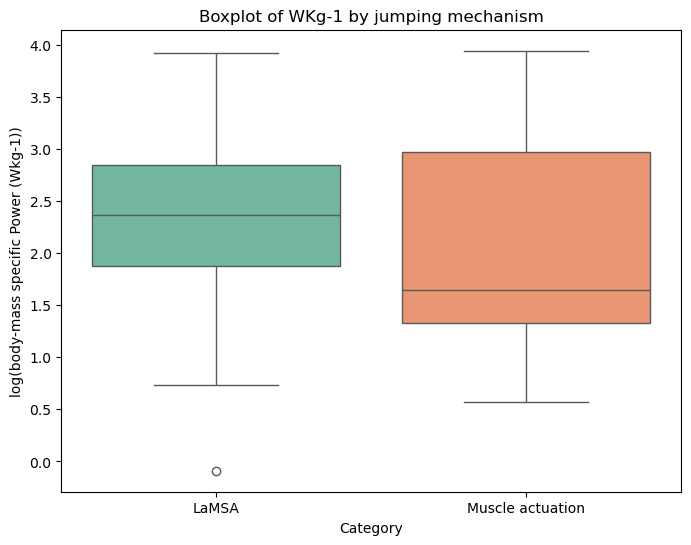

In [21]:
det='jump_mech'
X='body_m'
Y='to_v'
dataF = df

temp = drop_columns(dataF, X, Y, None, None, None)

unique_values = temp[det].unique()

for s in unique_values:
    data=find_thing(temp,det,s)
    #print(s+" "+graph_label(X)+" mean: "+str(data[X].mean()))
    #print(s+" "+graph_label(Y)+ " mean: "+str(data[Y].mean()))

print("\n\n")
#############################################################################

det='Class'
temp = drop_columns(dataF, X, Y, None, None, None)

unique_values = temp[det].unique()

for s in unique_values:
    data=find_thing(temp,det,s)
    #print(s+" "+graph_label(X)+" mean: "+str(data[X].mean()))
    #print(s+" "+graph_label(Y)+ " mean: "+str(data[Y].mean()))

print("\n\n")
#############################################################################
#do_avg(df, ['power','body_m', 'pwr_bm','mass_power','muscle_mass'], det='jump_mech')
mydict=do_avg(df, 'body_m', 'pwr_bm', det='jump_mech')
#print(y)
#print(len(y))

print(mydict)

data6 = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in mydict.items()]))

# Melt the DataFrame to make it long-form, which is suitable for seaborn
data_melted = data6.melt(var_name='Jumping mechanism', value_name='PWR_BM')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Jumping mechanism', y='PWR_BM', data=data_melted, palette='Set2')


# Add title and labels
plt.title('Boxplot of WKg-1 by jumping mechanism')
plt.xlabel('Category')
plt.ylabel('log(body-mass specific Power (Wkg-1))')
#ax.set_xticklabels(mydict.keys())



Confidence intervals for the coefficients:
              0         1
const  0.455430  0.820457
MM_BM  0.098937  0.407621


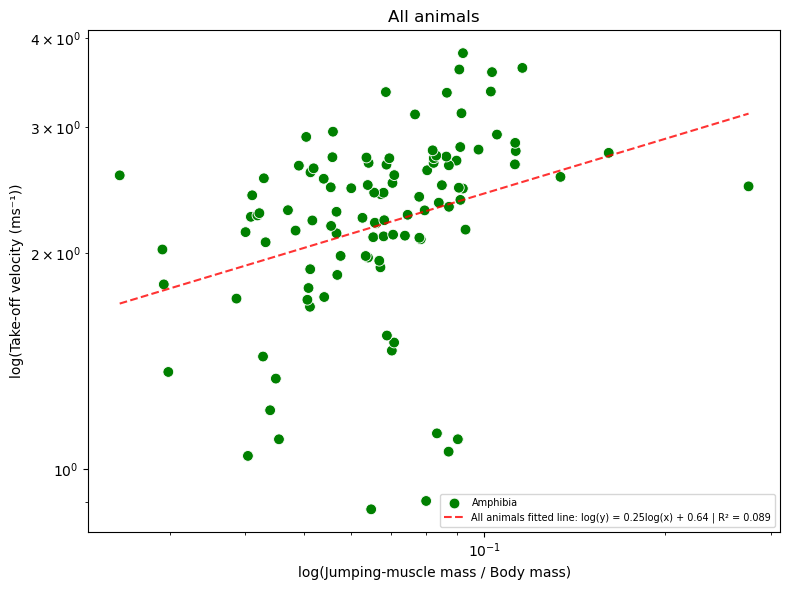

<Figure size 640x480 with 0 Axes>

In [22]:
f2, ax2 = plt.subplots(figsize=(8, 6))
X='MM_BM'
Y='to_v'
temp = drop_columns(df, X, Y, None, None, None)
temp = temp[temp['Class'] == 'Amphibia']

sns.scatterplot(data=temp, x=X, y=Y, ax=ax2, hue='Class',style='Class', s=60, palette={'Amphibia':'g'})

[x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(temp, X, Y, "true")
log_X_vals = np.linspace(x.min(), x.max(), 1000)
log_Y_vals = slope * log_X_vals + intercept

plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, "true", "All animals", "red")


X2 = sm.add_constant(x)
 # Fit the OLS model
model = sm.OLS(y, X2).fit()

 # Get the confidence intervals
conf_intervals = model.conf_int()

# Print the results
print(f"Confidence intervals for the coefficients:")
print(conf_intervals)

plt.xscale('log')
plt.yscale('log')

# Labels and title
#plt.title(title+" "+graph_label(X)+" vs "+graph_label(Y))
plt.xlabel("log("+graph_label(X)+")")
plt.ylabel("log("+graph_label(Y)+")")
    
#plt.legend(prop={'size': 7})
plt.legend(loc='lower right',prop={'size': 7})
plt.title("All animals")
f2.tight_layout()
fig1 = plt.gcf()
fig1.tight_layout()

den = "All animals"

fig1.savefig(fname=den+'-'+X+'-'+Y+'-log.png', bbox_inches='tight', dpi=100)
plt.show()
plt.draw()

Confidence intervals for the coefficients:
               0         1
const   0.264003  0.305799
body_m  0.052566  0.080165
Muscle actuation
                            OLS Regression Results                            
Dep. Variable:                   to_v   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     81.94
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.26e-16
Time:                        00:10:44   Log-Likelihood:                 57.897
No. Observations:                 202   AIC:                            -111.8
Df Residuals:                     200   BIC:                            -105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

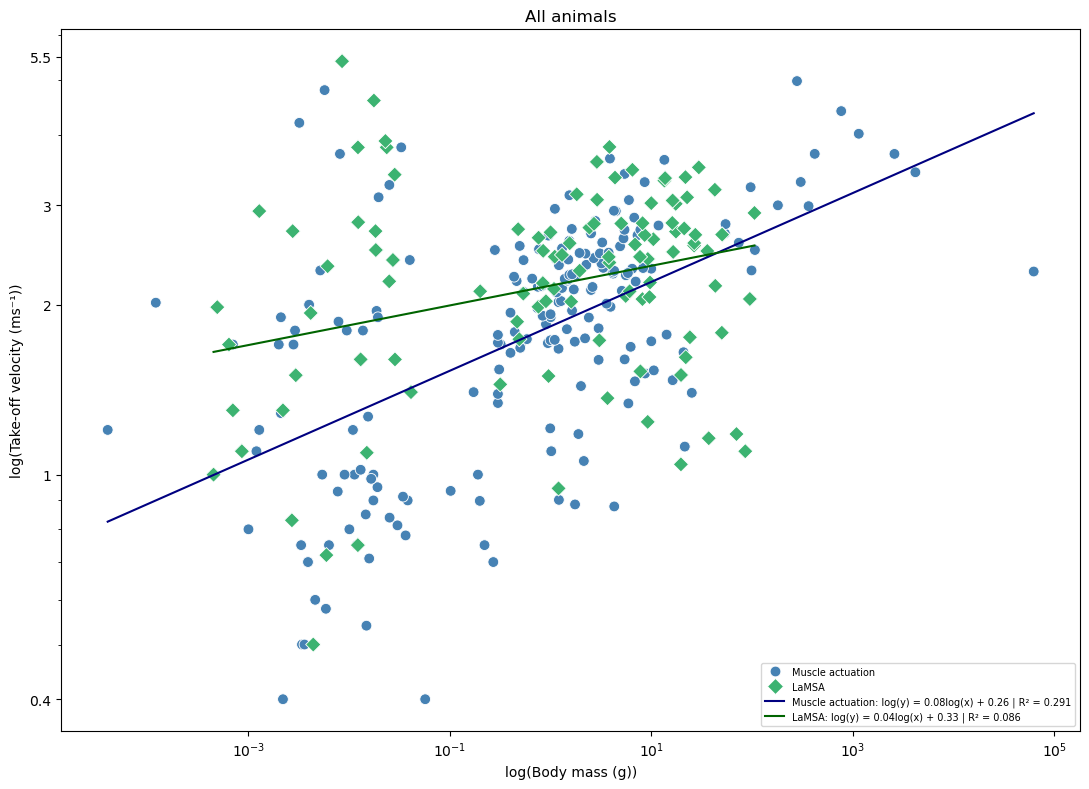

482
0.4
5.4
4e-05
62781.666666666664


<Figure size 640x480 with 0 Axes>

In [23]:
f2, ax2 = plt.subplots(figsize=(11, 8))
X='body_m'
Y='to_v'
temp = drop_columns(df, X, Y, None, None, None)

[x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(temp, X, Y, "true")
temp['logx']=x
temp['logy']=y


log_X_vals = np.linspace(x.min(), x.max(), 1000)
log_Y_vals = slope * log_X_vals + intercept
X2 = sm.add_constant(x)


# Fit the OLS model
model = sm.OLS(y, X2).fit()

# Get the confidence intervals
conf_intervals = model.conf_int()

# Print the results
print("Confidence intervals for the coefficients:")
print(conf_intervals)

#plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, "true", "All animals", "red")

markers = {'Muscle actuation': 'o', 'LaMSA': 'D', 'Body-catapult':'^', }
palette = {
    'Muscle actuation': 'steelblue',  # Circle
    'LaMSA': 'mediumseagreen',
    'Body-catapult': 'sandybrown',
      # Square
    }

data= pd.concat([temp[temp['jump_mech'] == 'Muscle actuation'],temp[temp['jump_mech'] == 'LaMSA']], axis=0, ignore_index=True)

sns.scatterplot(data=data, x=X, y=Y, ax=ax2, hue='jump_mech',style='jump_mech', s=60, markers=markers, palette=palette)
colors=['navy','darkgreen', 'darkgreen',]

unique_mechs = temp['jump_mech'].unique()
for i, mech in enumerate(unique_mechs):
    if mech == 'Body-catapult':
        continue
    subset = temp[temp['jump_mech'] == mech]

    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(subset, X, Y, "true")

    X2 = sm.add_constant(x)

    log_X_vals = np.linspace(x.min(), x.max(), 1000)
    log_Y_vals = slope * log_X_vals + intercept
    
    plot_otherfit(log_X_vals, log_Y_vals, slope, intercept, mech, color=colors[i % len(colors)], r2=r2)
    #species_reg_plot(temp,'jump_mech',X,Y)

    # Fit the OLS model
    model = sm.OLS(y, X2).fit()

    # Get the confidence intervals
    conf_intervals = model.conf_int()

    X2 = sm.add_constant(x)


    print(mech)
    print(model.summary())

    # Print the results
    print(f"Confidence intervals for the {mech} coefficients:")
    print(conf_intervals)


    """
    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(data2, X, Y, "true")
        
    x_fit = np.linspace(x.min(), x.max(), 1000)
    y_fit = slope * x_fit + intercept

    color = colors[i % len(colors)]
    plot_otherfit(x_fit, y_fit, slope, intercept, mech, color)
   """

plt.xscale('log')
plt.yscale('log')

plt.xscale('log',)  # Set x-axis to logarithmic scale with base e
plt.yscale('log',)

# Labels and title
#plt.title(title+" "+graph_label(X)+" vs "+graph_label(Y))
plt.xlabel("log("+graph_label(X)+")")
plt.ylabel("log("+graph_label(Y)+")")

#plt.xticks(np.arange(0.0015, 0.08, step=1))
#plt.yticks(np.arange(0.02, 210, step=1))

#x_ticks = LogLocator(base=10.0, subs=[1], numticks=100)  # Ticks at powers of 10 only (e.g., 1, 10, 100)
#y_ticks = LogLocator(base=10.0, subs=[1], numticks=100)
#y_ticks = LogLocator(base=np.e, subs='auto', numticks=100)

# Set custom y-axis ticks
# Set custom y-axis ticks
y_ticks = [ 0.4, 1, 2, 3, 5.5]  # Adjust these values according to your data range

# Set y-ticks and corresponding labels
plt.yticks(y_ticks, labels=[str(tick) for tick in y_ticks])


    
plt.legend(prop={'size': 7})
#plt.legend(loc='lower right',prop={'size': 6})
plt.title("All animals")
f2.tight_layout()
fig1 = plt.gcf()
fig1.tight_layout()

den = "All animals"

fig1.savefig(fname=den+'-'+X+'-'+Y+'-log.png', bbox_inches='tight', dpi=100)
plt.show()
plt.draw()

print(df['species'].nunique())
print(temp[Y].min())
print(temp[Y].max())
print(temp[X].min())
print(temp[X].max())

Confidence intervals for the coefficients:
         0   1
const  NaN NaN
body_m NaN NaN
Confidence intervals for the Muscle actuation coefficients:
               0         1
const   0.237086  0.288351
body_m  0.061546  0.095829
Confidence intervals for the LaMSA coefficients:
               0         1
const   0.301662  0.368062
body_m  0.013224  0.056981
Confidence intervals for the coefficients:
               0         1
const   1.500492  1.926335
body_m  0.567497  0.780823
Confidence intervals for the Muscle actuation coefficients:
               0         1
const   1.237222  1.783302
body_m  0.508349  0.776551
Confidence intervals for the LaMSA coefficients:
               0         1
const   1.714176  2.383792
body_m  0.509555  0.873042


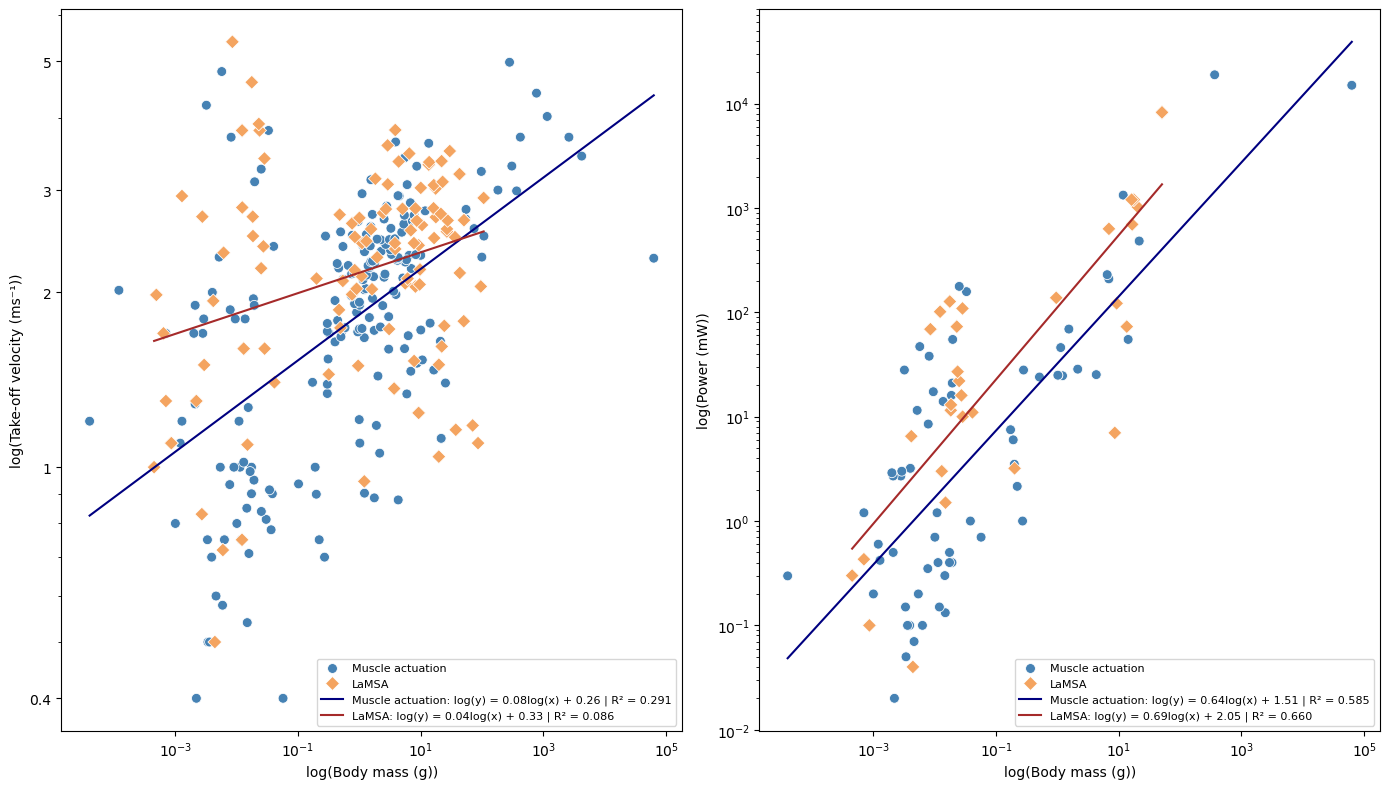

<Figure size 640x480 with 0 Axes>

In [24]:
f2, axes = plt.subplots(1, 2, figsize=(14, 8))
plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.1, wspace=0.2, hspace=0.3)

# First subplot
X='body_m'
Y='to_v'
temp = drop_columns(df, X, Y, None, None, None)
temp2 = drop_columns(df, X, 'pwr_bm', None, None, None)

[x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(temp, X, 'pwr_bm', "true")

temp['logx']=x
temp['logy']=y

log_X_vals = np.linspace(x.min(), x.max(), 1000)
log_Y_vals = slope * log_X_vals + intercept
X2 = sm.add_constant(x)



model = sm.OLS(y, X2).fit()
conf_intervals = model.conf_int()
print("Confidence intervals for the coefficients:")
print(conf_intervals)

markers = {'Muscle actuation': 'o', 'LaMSA': 'D', 'Body-catapult':'^'}
palette = {
    'Muscle actuation': 'steelblue',
    'LaMSA': 'sandybrown',
    'Body-catapult': 'sandybrown',
}

#data= pd.concat([temp[temp['Class'] == 'Muscle actuation'],temp[temp['jump_mech'] == 'LaMSA']], axis=0, ignore_index=True)
plt.sca(axes[0])
sns.scatterplot(data=data, x=X, y=Y, ax=axes[0], hue='jump_mech',style='jump_mech', s=50, markers=markers, palette=palette)
colors=['navy','brown', 'brown',]

unique_class = temp['jump_mech'].unique()
for i, mech in enumerate(unique_class):
    if mech == 'Body-catapult':
        continue
    subset = temp[temp['jump_mech'] == mech]
    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(subset, X, Y, "true")
    X2 = sm.add_constant(x)
    log_X_vals = np.linspace(x.min(), x.max(), 1000)
    log_Y_vals = slope * log_X_vals + intercept

    plot_otherfit(log_X_vals, log_Y_vals, slope, intercept, mech, color=colors[i % len(colors)], r2=r2,)
    #species_reg_plot(temp,'jump_mech',X,Y)

    # Fit the OLS model
    model = sm.OLS(y, X2).fit()
    conf_intervals = model.conf_int()
    print(f"Confidence intervals for the {mech} coefficients:")
    print(conf_intervals)

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel("log("+graph_label(X)+")")
axes[0].set_ylabel("log("+graph_label(Y)+")")
y_ticks = [0.4, 1, 2, 3, 5]
axes[0].set_yticks(y_ticks)
axes[0].set_yticklabels([str(tick) for tick in y_ticks])
axes[0].legend(prop={'size': 8}, loc='lower right')
#axes[0].set_title("Takeoff velocity vs Body mass")

plt.sca(axes[1])
# Second subplot
X='body_m'
Y='power'
temp = drop_columns(df, X, Y, None, None, None)


[x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(temp, X, Y, "true")
temp['logx']=x
temp['logy']=y

log_X_vals = np.linspace(x.min(), x.max(), 1000)
log_Y_vals = slope * log_X_vals + intercept
X2 = sm.add_constant(x)
#plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, "true", "All animals", "red")
model = sm.OLS(y, X2).fit()
conf_intervals = model.conf_int()
print("Confidence intervals for the coefficients:")
print(conf_intervals)

sns.scatterplot(data=data, x=X, y=Y, ax=axes[1], hue='jump_mech', style='jump_mech', s=50, markers=markers, palette=palette)

unique_class = temp['jump_mech'].unique()
for i, mech in enumerate(unique_class):
    if mech == 'Body-catapult':
        continue
    subset = temp[temp['jump_mech'] == mech]
    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(subset, X, Y, "true")
    X2 = sm.add_constant(x)
    log_X_vals = np.linspace(x.min(), x.max(), 1000)
    log_Y_vals = slope * log_X_vals + intercept
    plot_otherfit(log_X_vals, log_Y_vals, slope, intercept, mech, color=colors[i % len(colors)], r2=r2, )
    model = sm.OLS(y, X2).fit()
    conf_intervals = model.conf_int()
    print(f"Confidence intervals for the {mech} coefficients:")
    print(conf_intervals)

axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel("log("+graph_label(X)+")")
axes[1].set_ylabel("log("+graph_label(Y)+")")
axes[1].legend(prop={'size': 8}, loc='lower right')
#axes[1].set_title("Power vs Body mass")

plt.tight_layout()
plt.show()
plt.draw()

den = "All animals"
fig1 = plt.gcf()
fig1.savefig(fname=den+'-'+X+'-'+Y+'-log.png', bbox_inches='tight', dpi=100)


In [25]:
def plot_jump_mech_regression(df):
    plt.figure(figsize=(10, 6))

    # Plotting data with log-log scale
    sns.scatterplot(data=df, x='body_m', y='to_v', hue='jump_mech', palette='Set1')
    plt.xscale('log')
    plt.yscale('log')

    palette = {
    'Lithobates_pipiens': 'g',  # Circle
    'Pseudacris_triseriata': 'darkviolet',  # Square
    'Limnodynastes_peronii': 'royalblue',   # Triangle
    'Eleutherodactylus_fitzinger': 'sienna',
    'Anaxyrus_americanus': 'orange',
    'Amphibia':'royalblue',
    }

    
    # Plot regression lines for each 'jump_mech'
    unique_mechs = df['jump_mech'].unique()
    for mech in unique_mechs:
        subset = df[df['jump_mech'] == mech]
        X = np.log10(subset['body_m'])
        y = np.log10(subset['to_v'])
        X = sm.add_constant(X)  # Adds a constant term to the predictor
        model = sm.OLS(y, X).fit()
        intercept, slope = model.params
        x_vals = np.log10(np.array([df['body_m'].min(), df['body_m'].max()]))
        plt.plot(10**x_vals, 10**(intercept + slope * x_vals), label=f'{mech} regression '+str(slope)+" "+str(intercept), )
    
    # Plot overall regression line
    X_all = np.log10(df['body_m'])
    y_all = np.log10(df['to_v'])
    X_all = sm.add_constant(X_all)  # Adds a constant term to the predictor
    model_all = sm.OLS(y_all, X_all).fit()
    intercept_all, slope_all = model_all.params
    plt.plot(10**x_vals, 10**(intercept_all + slope_all * x_vals), label='Overall regression '+str(slope)+" "+str(intercept), color='black', linestyle='--')
    
    plt.xlabel('Body Mass (log scale)')
    plt.ylabel('Takeoff Velocity (log scale)')
    plt.legend()
    plt.title('Log-Log Plot of Body Mass vs. Takeoff Velocity with Regression Lines')
    plt.show()

# Assuming df is the DataFrame from your notebook
# plot_jump_mech_regression(df)

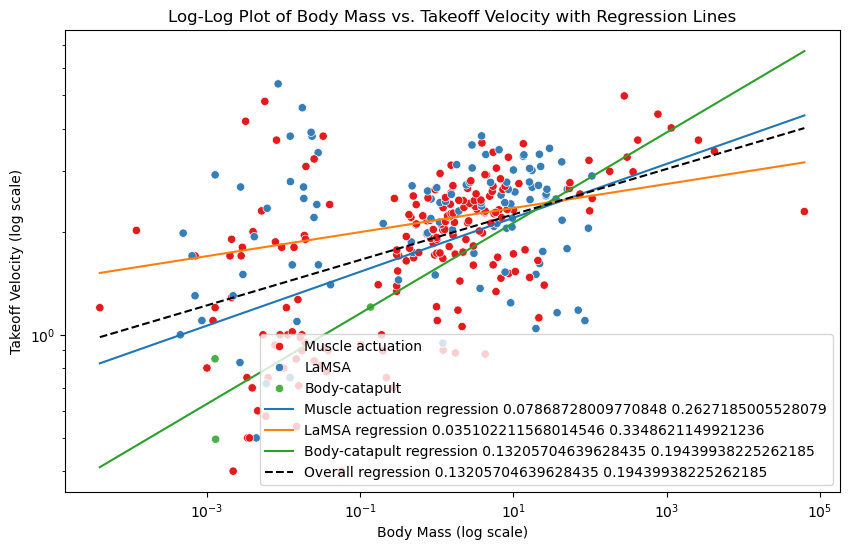

In [26]:
x='body_m'
y='to_v'
temp = drop_columns(df, x, y, None, None, None)

plot_jump_mech_regression(temp)

In [27]:
def plotting(df, X, Y, class_type, order, species, f, ax2, logQ, hueV, group):
    from statsmodels.stats.outliers_influence import summary_table
    from statsmodels.formula.api import ols

    palette = {
    'Lithobates_pipiens': 'g',  # Circle
    'Pseudacris_triseriata': 'darkviolet',  # Square
    'Limnodynastes_peronii': 'royalblue',   # Triangle
    'Eleutherodactylus_fitzinger': 'sienna',
    'Anaxyrus_americanus': 'orange',
    'Amphibia':'royalblue',
    }
    palette2 = {
    'Lithobates pipiens': 'g',  # Circle
    'Pseudacris triseriata': 'darkviolet',  # Square
    'Limnodynastes peronii': 'royalblue',   # Triangle
    'Eleutherodactylus fitzinger': 'sienna',
    'Anaxyrus americanus': 'orange',
    'Amphibia':'royalblue',
    }

    temp = df
    x=temp[X]
    y=temp[Y]


    print(y.min())
    #f, ax = plt.subplots(figsize=(8, 6))
    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(temp, X, Y, "true")

    
    temp['logx']=x
    temp['logy']=y

    temp['highlight'] = temp['speciesN'].apply(lambda x: x if x in group else 'Amphibia')
    temp['size'] = temp['speciesN'].apply(lambda x: 70 if x in group else 50)
    
    test = []
    rows=[]
    
    for s in group:
        for index, row in temp.iterrows():
            if row['speciesN'] == s:
                test.append(row)
    
    dd=pd.DataFrame(test)
    
    log_X_vals = np.linspace(x.min(), x.max(), 1000)
    log_Y_vals = slope * log_X_vals + intercept


    X2 = sm.add_constant(x)

    # Fit the OLS model
    model = sm.OLS(y, X2).fit()

    # Get the confidence intervals
    conf_intervals = model.conf_int()

    # Print the results
    print("Confidence intervals for the coefficients:")
    print(conf_intervals)
    print(model.summary())

    
    temp['priority'] = temp['speciesN'].apply(lambda x: 1 if x in group else 0)

    temp['Ancova'] = temp['speciesN'].apply(lambda x: x if x in group else 'Amphibia')
    """
    # Define the ANCOVA model
    model = ols('logy ~ logx * Ancova', data=temp).fit()

    # Print the summary of the model
    print(model.summary())
    p_values = model.pvalues

    # Print p-values
    print("\nP-values for the model terms:")
    print(p_values)
    """
    filtered_df=temp[temp['speciesN'].isin(group)]
    f_sorted = filtered_df.sort_values(by='priority').drop(columns=['priority']).reset_index(drop=True)

    markers = {'Amphibia': 'o', 'Limnodynastes peronii': 's', 'Lithobates pipiens':'D', 'Anaxyrus americanus':'X', 'Eleutherodactylus fitzinger':'p', 'Pseudacris triseriata':'^'}

    sns.scatterplot(data=f_sorted, x=X, y=Y, hue = 'highlight', style='highlight', ax=ax2, palette=palette2, markers=markers)
    plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, logQ, 'Amphibia', 'red')
    species_reg_plot(temp, group, X, Y)
    #sns.scatterplot(data=dd, x=X, y=Y, hue = 'highlight', style='highlight', s=50, palette=palette)
  
    #Set log scale
    plt.xscale('log')
    plt.yscale('log')

    # Labels and title
    #plt.title(title+" "+graph_label(X)+" vs "+graph_label(Y))
    plt.xlabel("log("+graph_label(X)+")")
    plt.ylabel("log("+graph_label(Y)+")")
    
    #plt.legend(prop={'size': 7})
    plt.legend(loc='lower right',prop={'size': 6.5})
    plt.xlim(0.038, 129)
    plt.ylim(0.5, 5)
    #f.tight_layout()
    #fig1 = plt.gcf()
    #fig1.tight_layout()

    den = species
    if species == None:
        den = class_type
    if class_type == None:
        den="All animals"
    #print(df[Y].max())

0.3859026656874259
Confidence intervals for the coefficients:
               0         1
const   0.223751  0.251411
body_m  0.069990  0.101032
                            OLS Regression Results                            
Dep. Variable:                   to_v   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.13e-25
Time:                        00:10:46   Log-Likelihood:                 304.39
No. Observations:                 883   AIC:                            -604.8
Df Residuals:                     881   BIC:                            -595.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

c:\Users\tiago\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


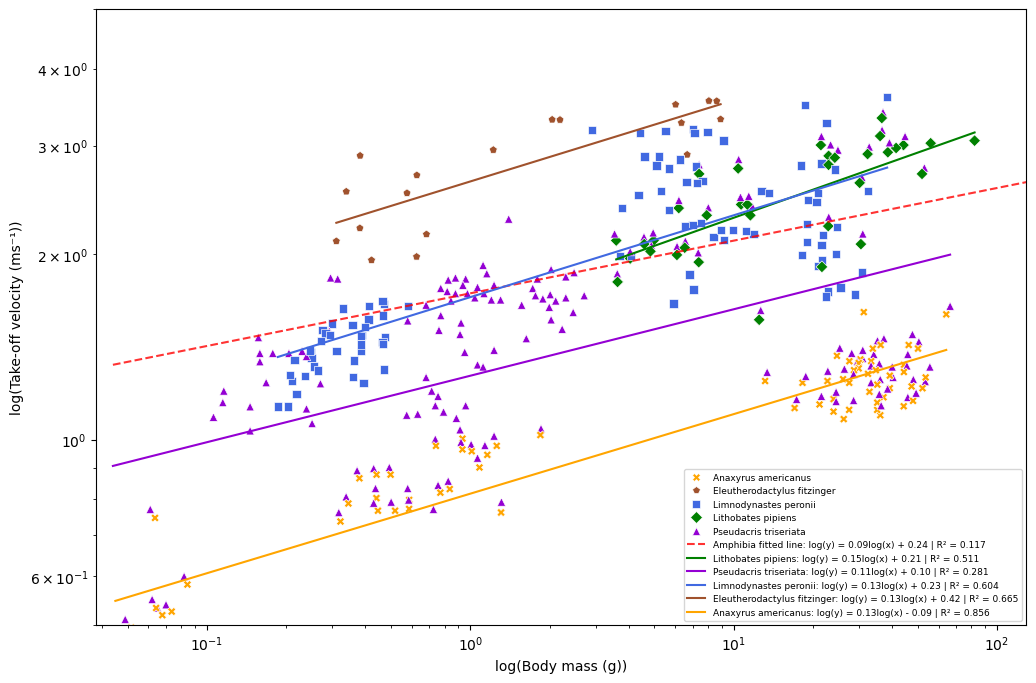

In [28]:
f2, ax2 = plt.subplots(figsize=(12, 8))
X='body_m'
Y='to_v'
temp = drop_columns(df_all, X, Y, 'Amphibia', None, None)
plotting(temp, X, Y, 'Amphibia', None, None, f2, ax2, "true", None, specsAmph)
plt.show()

In [29]:
lamsas=df[df['jump_mech'] == 'LaMSA']

amphibian_count = lamsas['Class'].value_counts().get('Amphibia', 0)

# Calculate the total number of entries
total_count = len(lamsas)

# Calculate the percentage
percentage_amphibian = (amphibian_count / total_count) * 100

print(f"Percentage of Amphibians: {percentage_amphibian:.2f}%")

Percentage of Amphibians: 71.23%


In [30]:
def plotting2(df0, X, Y, class_type, order, species, f, ax2, logQ, hueV):
    from statsmodels.stats.outliers_influence import summary_table
    from statsmodels.formula.api import ols

    palette = {
    'Teleogryllus commodus': 'g',  # Circle
    'Stagmomantis theophila': 'darkviolet',  # Square
    'Schistocerca gregaria': 'royalblue',   # Triangle
    'Coleoptera Elateridae': 'sienna',
    #'Anaxyrus_americanus': 'orange',
    'Insecta':'royalblue',
    }
    #specsInsecta= ['Teleogryllus commodus', 'Stagmomantis theophila', 'Schistocerca gregaria', 'Coleoptera Elateridae', ]
    temp = df0
    #f, ax = plt.subplots(figsize=(8, 6))
    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(temp, X, Y, "true")

    
    temp['logx']=x
    temp['logy']=y

    temp['highlight'] = temp['speciesN'].apply(lambda x: x if x in specsInsecta else 'Insecta')
    temp['size'] = temp['speciesN'].apply(lambda x: 70 if x in specsInsecta else 50)
    
    test = []
    rows=[]
    
    for s in specsInsecta:
        for index, row in temp.iterrows():
            if row['speciesN'] == s:
                test.append(row)
    
    dd=pd.DataFrame(test)
    
    log_X_vals = np.linspace(x.min(), x.max(), 1000)
    log_Y_vals = slope * log_X_vals + intercept


    X2 = sm.add_constant(x)

    # Fit the OLS model
    model = sm.OLS(y, X2).fit()

    # Get the confidence intervals
    conf_intervals = model.conf_int()
    print(mech)
    print(model.summary())

    # Print the results
    #print("Confidence intervals for the coefficients:")
    #print(conf_intervals)

    temp['priority'] = temp['speciesN'].apply(lambda x: 1 if x in specsInsecta else 0)



    filtered_df=temp[temp['speciesN'].isin(specsInsecta)]
    f_sorted = filtered_df.sort_values(by='priority').drop(columns=['priority']).reset_index(drop=True)

    specs= ['Teleogryllus commodus', 'Stagmomantis theophila', 'Schistocerca gregaria', 'Coleoptera Elateridae', ]

    markers = {'Insecta': 'o', 'Teleogryllus commodus': '^', 'Stagmomantis theophila':'s', 'Schistocerca gregaria':'X', 'Coleoptera Elateridae':'p',}

    
    sns.scatterplot(data=f_sorted, x=X, y=Y, hue = 'highlight', style='highlight', ax=ax2, palette=palette, markers=markers)
    plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, logQ, 'Insecta', 'red')
    species_reg_plot(df_all, specsInsecta, X, Y)
  
    #Set log scale
    plt.xscale('log')
    plt.yscale('log')

    # Labels and title
    #plt.title(title+" "+graph_label(X)+" vs "+graph_label(Y))
    plt.xlabel("log("+graph_label(X)+")")
    plt.ylabel("log("+graph_label(Y)+")")
    
    #plt.legend(prop={'size': 7})
    plt.legend(loc='upper left',prop={'size': 6.5})
    plt.xlim(0.004, 2.7)
    #plt.ylim(-2, 4)
    #f.tight_layout()
    #fig1 = plt.gcf()
    #fig1.tight_layout()

    den = species
    if species == None:
        den = class_type
    if class_type == None:
        den="All animals"
    #fig1.savefig(fname=den+'-'+X+'-'+Y+'-log.png', bbox_inches='tight', dpi=100)
    #plt.show()
    #plt.draw()

    

    #print(df[Y].max())

In [31]:
"""print("Schisto")
compare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.0985, 0.1770, 0.024, 0.017,91)
print("\n\nTeleogryllus")
compare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.2525, 0.3099, 0.077, 0.026,91)
print("\n\nStagmomantis")
compare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.1184, 0.0734, 0.008, 0.011,66)
print("\n\nColeoptera")
compare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.0106, 0.0824, 0.039, 0.047,36)"""

'print("Schisto")\ncompare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.0985, 0.1770, 0.024, 0.017,91)\nprint("\n\nTeleogryllus")\ncompare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.2525, 0.3099, 0.077, 0.026,91)\nprint("\n\nStagmomantis")\ncompare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.1184, 0.0734, 0.008, 0.011,66)\nprint("\n\nColeoptera")\ncompare_slopes_and_intercepts(0.005, 0.1558, 0.007, 0.012, 0.0106, 0.0824, 0.039, 0.047,36)'

Body-catapult
                            OLS Regression Results                            
Dep. Variable:                   to_v   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5726
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.450
Time:                        00:10:47   Log-Likelihood:                 106.61
No. Observations:                 559   AIC:                            -209.2
Df Residuals:                     557   BIC:                            -200.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1558      0.012     1

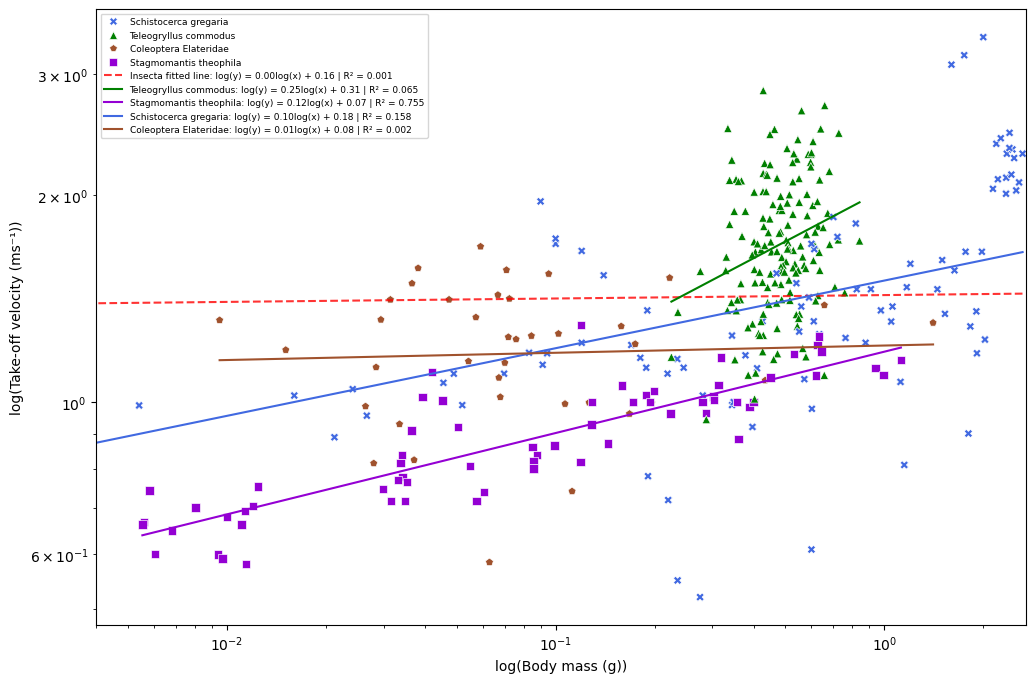

In [32]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10)) # 2x2 grid of subplots
f2, ax2 = plt.subplots(figsize=(12, 8))
X='body_m'
Y='to_v'
#temp = drop_columns(df_all, X, Y, 'Amphibia', None, None)
temp2 = drop_columns(df_all, X, Y, 'Insecta', None, None)
#plotting(temp, X, Y, 'Amphibia', None, None, f2, ax1, "true", None, specsAmph)
plotting2(temp2, X, Y, 'Insecta', None, None, f2, ax2, "true", None,)

plt.show()

In [33]:
def plotting3_optimized(df, X, Y, class_type, order, species, ax2, logQ, hueV):
        from statsmodels.formula.api import ols
        
        palette = {
            'Amphibia': 'g',
            'Insecta': 'darkviolet',
            'Mammalia': 'royalblue',
        }

        temp = df
        x = temp[X]
        y = temp[Y]

        [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(df, X, Y, "true")

        temp['logx'] = x
        temp['logy'] = y

        temp['highlight'] = temp['Class'].apply(lambda x: x if x in specsClass else 'Other')
        temp['size'] = temp['Class'].apply(lambda x: 70 if x in specsClass else 50)

        log_X_vals = np.linspace(x.min(), x.max(), 1000)
        log_Y_vals = slope * log_X_vals + intercept

        sns.scatterplot(data=temp, x=X, y=Y, hue='highlight', style='highlight', 
                        size='size', ax=ax2, palette=palette)
        
        plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, logQ, 'All animals', 'red')

        ax2.set_xscale('log')
        ax2.set_yscale('log')

        ax2.set_xlabel(f"{graph_label(X)} (log10 base)")
        ax2.set_ylabel(f"{graph_label(Y)} (log10 base)")

        ax2.legend(loc='upper left', prop={'size': 7})
        ax2.set_xlim(0.005, 2.7)

        # ANCOVA model
        model = ols('logy ~ logx * Ancova', data=temp).fit()
        print(model.summary())

        return ax2

In [34]:
f=plt.figure(figsize=(10, 5))
X='body_m'
Y='to_v'
temp = drop_columns(df_all, X, Y, 'Amphibia', None, None)
temp2 = drop_columns(df_all, X, Y, 'Insecta', None, None)
# Call the first function in the first subplot
#plt.subplot(1, 2, 1)  # 1 row, 3 columns, 1st subplot
#def plotting_optimized(df, X, Y, class_type, order, species, ax, logQ, hueV):
"""
plotting_optimized(temp, X, Y, 'Amphibia', None, None, ax2, "true", None)
plt.subplot(1, 2, 2)
plotting3_optimized(temp2, X, Y, 'Insecta', None, None, ax2, "true", None)
"""
#plotting(temp, X, Y, 'Amphibia', None, None, f, ax2, "true", None, specsAmph)
#plt.subplot(1, 2, 2)
#plotting2(temp2, X, Y, 'Insecta', None, None, f, ax2, "true", None)

# Adjust the layout
#plt.tight_layout()

# Show the figure with all subplots
#plt.show()

'\nplotting_optimized(temp, X, Y, \'Amphibia\', None, None, ax2, "true", None)\nplt.subplot(1, 2, 2)\nplotting3_optimized(temp2, X, Y, \'Insecta\', None, None, ax2, "true", None)\n'

<Figure size 1000x500 with 0 Axes>

Body-catapult
                            OLS Regression Results                            
Dep. Variable:                   to_v   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5726
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.450
Time:                        00:10:48   Log-Likelihood:                 106.61
No. Observations:                 559   AIC:                            -209.2
Df Residuals:                     557   BIC:                            -200.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1558      0.012     1

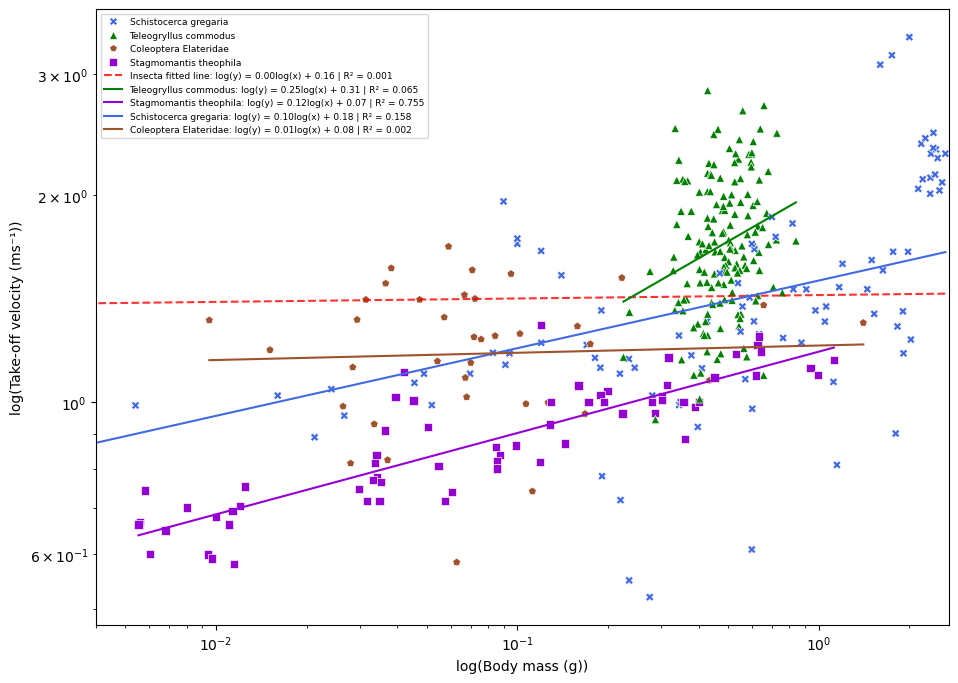

In [35]:
f2, ax2 = plt.subplots(figsize=(11, 8))
x='body_m'
y='to_v'
temp = drop_columns(df_all, x, y, 'Insecta', None, None)
plotting2(temp, x, y, 'Insecta', None, None, f2, ax2, "true", None)

In [36]:
def plotting3(df, X, Y, class_type, order, species, f, ax2, logQ, hueV):
    from statsmodels.stats.outliers_influence import summary_table
    from statsmodels.formula.api import ols

    palette = {
    'Amphibia': 'g',  # Circle
    'Insecta': 'darkviolet',  # Square
    'Mammalia': 'royalblue',   # Triangle
    #'Coleoptera_Elateridae': 'sienna',
    #'Anaxyrus_americanus': 'orange',
    #'Insecta':'royalblue',
    }

    temp = df
    x=temp[X]
    y=temp[Y]


    print(y.min())
    #f, ax = plt.subplots(figsize=(8, 6))
    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(df, X, Y, "true")

    
    temp['logx']=x
    temp['logy']=y

    temp['highlight'] = temp['Class'].apply(lambda x: x if x in specsClass else 'Other')
    temp['size'] = temp['Class'].apply(lambda x: 70 if x in specsClass else 50)
    
    test = []
    rows=[]
    
    for s in specsClass:
        for index, row in temp.iterrows():
            if row['Class'] == s:
                test.append(row)
    
    dd=pd.DataFrame(test)
    
    log_X_vals = np.linspace(x.min(), x.max(), 1000)
    log_Y_vals = slope * log_X_vals + intercept

    plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, logQ, 'All animals')

    X2 = sm.add_constant(x)

    # Fit the OLS model
    model = sm.OLS(y, X2).fit()

    # Get the confidence intervals
    conf_intervals = model.conf_int(0.05)

    # Print the results
    #print("Confidence intervals for the coefficients:")
    #print(conf_intervals)

    temp['priority'] = temp['Class'].apply(lambda x: 1 if x in specsClass else 0)

    temp['Ancova'] = temp['Class'].apply(lambda x: x if x in specsClass else 'Other')

    # Define the ANCOVA model
    model = ols('logy ~ logx * Ancova', data=temp).fit()

    # Print the summary of the model
    print(model.summary())

    filtered_df=temp[temp['Class'].isin(specsClass)]
    f_sorted = filtered_df.sort_values(by='priority').drop(columns=['priority']).reset_index(drop=True) 

    markers = {'Amphibia': 'o', 'Insecta': '^', 'Mammalia':'D', }

    
    sns.scatterplot(data=f_sorted, x=X, y=Y, hue = 'highlight', style='highlight', ax=ax2, palette=palette, markers=markers)

    #plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, logQ, 'Amphibia')
    #plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, logQ, 'Insecta')
    #plot_fitf(log_X_vals, log_Y_vals, slope, intercept, r2, ax2, logQ, 'Mammalia')
    class_reg_plot(specsClass, X, Y)
    
    #species_reg_plot(specs, X, Y)
  
    #Set log scale
    plt.xscale('log')
    plt.yscale('log')

    # Labels and title
    #plt.title(title+" "+graph_label(X)+" vs "+graph_label(Y))
    plt.xlabel("log("+graph_label(X)+")")
    plt.ylabel("log("+graph_label(Y)+")")
    
    #plt.legend(prop={'size': 7})
    plt.legend(loc='upper left',prop={'size': 6})
    #plt.xlim(0.003, 3)
    #plt.ylim(-2, 4)
    f.tight_layout()
    fig1 = plt.gcf()
    fig1.tight_layout()

    den = species
    if species == None:
        den = class_type
    if class_type == None:
        den="All animals"
    fig1.savefig(fname=den+'-'+X+'-'+Y+'-log.png', bbox_inches='tight', dpi=100)
    plt.show()
    plt.draw()

    #print(df[Y].max())

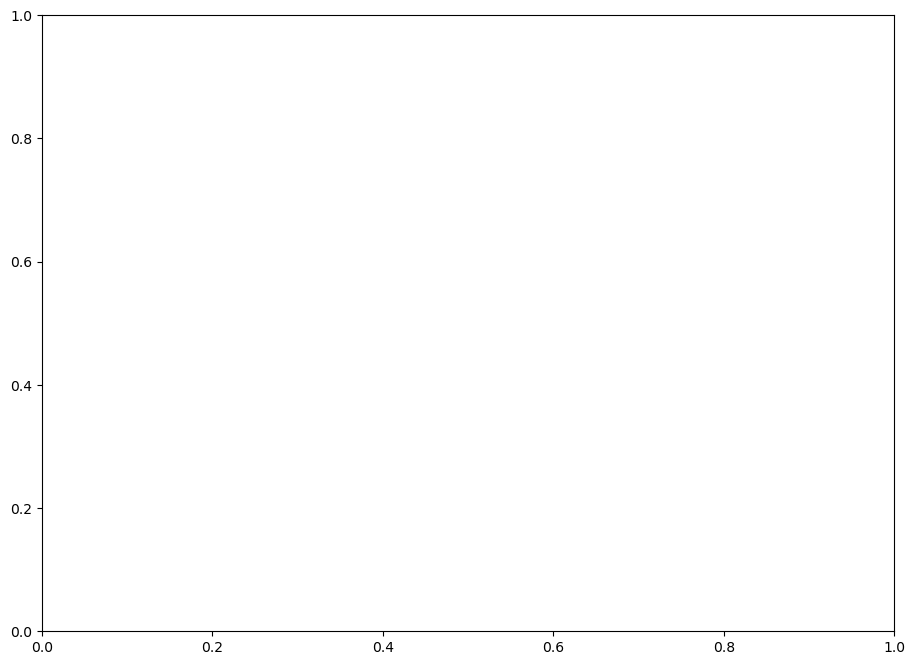

In [37]:
f2, ax2 = plt.subplots(figsize=(11, 8))
x='body_m'
y='to_v'
temp = drop_columns(df_all, x, y, None, None, None)
#plotting3(temp, x, y, None, None, None, f2, ax2, "true", None)

In [38]:
def model_fit(data, X, Y, power):
    from sklearn.metrics import r2_score, mean_squared_error
    temp = data
    temp['logx']=np.log10(temp[X])
    temp['logy']=np.log10(temp[Y])
    # Assume y_true are your observed values, and y_pred are the model's predictions
    temp['y_pred'] = temp['logx']*power
    y_true = np.array(temp['logy'])
    y_pred = np.array(temp['y_pred'])

    # 1. Visual Inspection
    plt.scatter(10**y_true, 10**y_pred)
    plt.plot([min(10**y_true), max(10**y_true)], [min(10**y_true), max(10**y_true)], 'r--')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.title('Observed vs Predicted')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

    # Residual plot
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Residual Plot')
    plt.show()

    # 2. Statistical Measures
    r_squared = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    print(f'R-squared: {r_squared}')
    print(f'RMSE: {rmse}')

N= 883


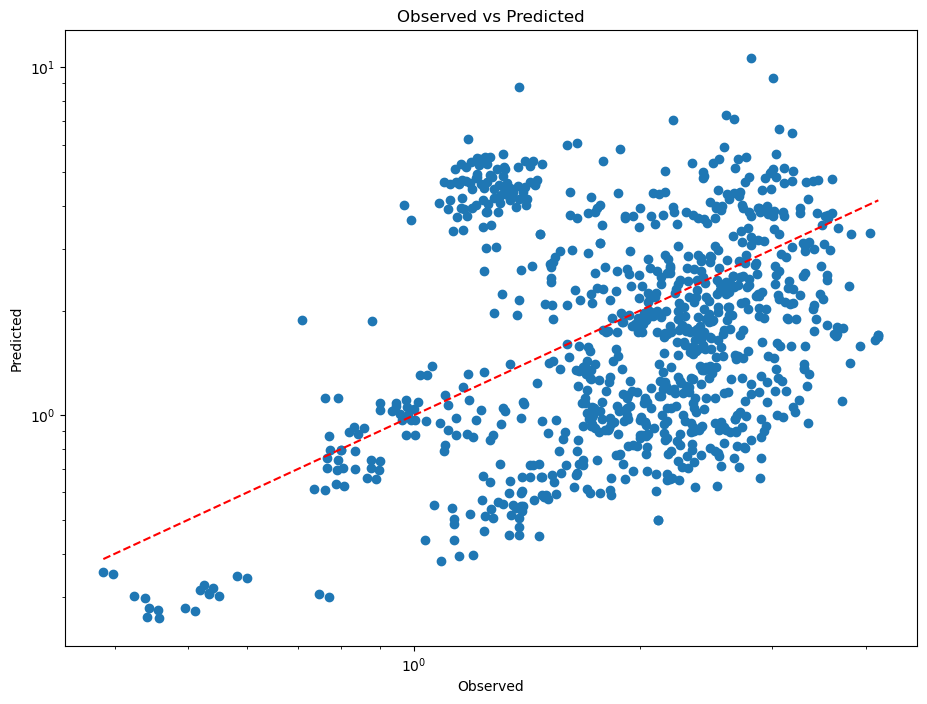

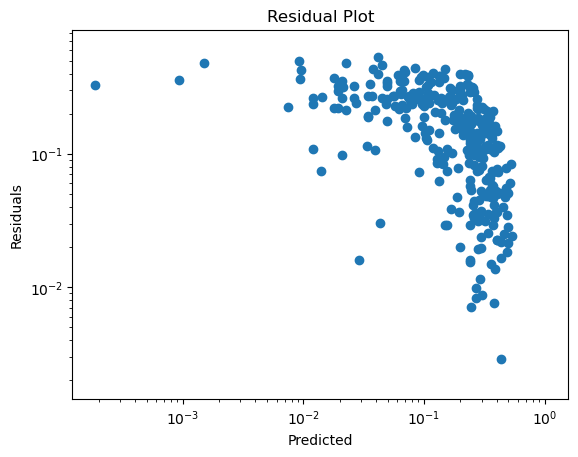

R-squared: -1.898777368832537
RMSE: 0.3106123403099891


In [39]:
f2, ax2 = plt.subplots(figsize=(11, 8))
x='body_m'
y='to_v'
temp = drop_columns(df_all, x, y, 'Amphibia', None, None)
print("N= "+str(temp.index.size))
model_fit(temp, x, y, 0.43)

In [73]:
def model_fit2(data, X, Y, power):
    from sklearn.metrics import mean_squared_error, r2_score
    from scipy.stats import f_oneway
    from statsmodels.formula.api import ols
    import statsmodels.api as sm
    # Assuming log_body_m and log_to_v are your log-transformed data
    boot = data
    log_body_m = np.log10(boot[X])
    log_to_v = np.log10(boot[Y])
    print(log_to_v.mean())

    # Predict log(Y) based on  model
    log_Y_pred = power * log_body_m
    size=log_Y_pred.size

    if power == 0.23:
        log_Y_pred = 0.26+power*log_body_m
    
    if power == 10:
        n = len(log_to_v)
        mylist=np.full(size, log_to_v.mean())
        print("TRYGPT")
        print(f"Mean: {10**log_to_v.mean()}")
        residuals = log_to_v - mylist

        # Perform ANOVA (F-test) to compare variances
        f_statistic, p_value = f_oneway(log_to_v, mylist)

        # Output the F-statistic and p-value
        print(f"F-statistic: {f_statistic:.3f}")
        print(f"P-value: {p_value:.3e}")

        mse = mean_squared_error(log_to_v, mylist)
        rmse = np.sqrt(mse)
        r_squared = r2_score(log_to_v, mylist)

        print(f"Mean Squared Error: {mse}")
        print(f"Root Mean Squared Error: {rmse}")
        k = 2  # Change this if you have more parameters

        # Calculate residuals
        residuals = log_to_v - mylist

        # Calculate RSS (Residual Sum of Squares)
        RSS = np.sum(residuals**2)

        # Calculate AIC
        AIC = 2*k + n*np.log(RSS/n)

        # Calculate BIC
        BIC = np.log(n)*k + n*np.log(RSS/n)

        # Calculate Pearson Correlation Coefficient
        pearson_corr, _ = stats.pearsonr(log_to_v, mylist)

        # Calculate Standard Error of the Estimate (SEE)
        SEE = np.sqrt(RSS / (n - k))

        # Calculate Adjusted R-squared
        adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - k - 1))

        print(f"AIC: {AIC}")
        print(f"BIC: {BIC}")
        print(f"Pearson Correlation Coefficient: {pearson_corr}")
        print(f"SEE: {SEE}")
        print(f"Adjusted R2: {adjusted_r_squared}")
        return

    """residuals = y_true - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted')
        """

    
    print("TRYGPT")
    # Calculate residuals (differences between measured and predicted data)
    residuals = log_to_v - log_Y_pred

    # Perform ANOVA (F-test) to compare variances
    f_statistic, p_value = f_oneway(log_to_v, log_Y_pred)

    # Output the F-statistic and p-value
    print(f"F-statistic: {f_statistic:.3f}")
    print(f"P-value: {p_value:.3e}")

    mse = mean_squared_error(log_to_v, log_Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(log_to_v, log_Y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")

    n = len(log_to_v)

    # Number of parameters in the model (including intercept)
    k = 2  # Change this if you have more parameters

    # Calculate residuals
    residuals = log_to_v - log_Y_pred

    # Calculate RSS (Residual Sum of Squares)
    RSS = np.sum(residuals**2)

    # Calculate AIC
    AIC = 2*k + n*np.log(RSS/n)

    # Calculate BIC
    BIC = np.log(n)*k + n*np.log(RSS/n)

    # Calculate Pearson Correlation Coefficient
    pearson_corr, _ = stats.pearsonr(log_to_v, log_Y_pred)
    r_squared = r2_score(log_to_v, log_Y_pred)

    # Calculate Standard Error of the Estimate (SEE)
    SEE = np.sqrt(RSS / (n - k))

    # Calculate Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - k - 1))

    print(f"AIC: {AIC}")
    print(f"BIC: {BIC}")
    print(f"Pearson Correlation Coefficient: {pearson_corr}")
    print(f"R-squared: {r_squared}")
    print(f"Standard Error of the Estimate (SEE): {SEE}")
    print(f"Adjusted R-squared: {adjusted_r_squared}")

    f2, ax2 = plt.subplots(figsize=(11, 8))
    X_vals = np.linspace(log_body_m.min(), log_body_m.max(), 1000)
    # Plotting
    """plt.scatter(boot[X], boot[Y], label='Data')
    plt.plot(10**X_vals, 10**(power*X_vals), color='red', label=f'Fit: y = {power:.2f}x')
    plt.axhline(10**log_to_v.mean(),color='g')
    plt.plot()
    plt.xscale('log')
    plt.yscale('log')

    # Labels and title
    plt.xlabel("log("+graph_label(X)+")")
    plt.ylabel("log("+graph_label(Y)+")")
    
    plt.legend(loc='lower right',prop={'size': 6.5})
    plt.ylim(0.32, 5.8)
    plt.show()"""


    # Step 1: Generate Sample Data and Models
    # Assume you have actual data and predictions from three models
    actual = log_to_v

    # Predictions from three different models
    model_1_pred = 0.33 * log_body_m + 0.29
    model_2_pred = 0.33 * log_body_m

    """model_1_pred = np.array([4.8, 6.5, 9.1, 12.0, 14.9])
    model_2_pred = np.array([5.1, 6.8, 8.9, 12.2, 15.3])
    model_3_pred = np.array([4.9, 7.0, 9.0, 11.8, 14.7])"""

    # Step 2: Calculate Residuals (Observed - Predicted)
    residuals_model_1 = actual - model_1_pred
    residuals_model_2 = actual - model_2_pred
    #residuals_model_3 = actual - model_3_pred

    # Step 3: Prepare Data for ANOVA
    # Create a pandas DataFrame with residuals and corresponding model labels
    data = pd.DataFrame({
        'Residuals': np.concatenate([residuals_model_1, residuals_model_2]),
        'Model': ['Model_1/3'] * len(residuals_model_1) + ['Model_1/9'] * len(residuals_model_2)
    })
    """data = pd.DataFrame({
        'Residuals': np.concatenate([residuals_model_1, residuals_model_2, residuals_model_3]),
        'Model': ['Model_1/3'] * len(residuals_model_1) + ['Model_1/9'] * len(residuals_model_2) + ['Model_1/6'] * len(residuals_model_3)
    })"""

    # Step 4: Perform ANOVA using statsmodels
    """anova_model = ols('Residuals ~ C(Model)', data=data).fit()
    anova_table = sm.stats.anova_lm(anova_model, typ=2)

    print(anova_table)"""


    # Output the slope and intercept
    #print(f"Slope (should be close to 0.43): {slope}")
    #print(f"Intercept: {intercept}")

0.27201143897187685
TRYGPT
F-statistic: 120.583
P-value: 8.784e-26
Mean Squared Error: 0.30889978152369785
Root Mean Squared Error: 0.5557875327170427
R-squared: -5.916141786342361
AIC: -366.0425916938841
BIC: -358.53744641623285
Pearson Correlation Coefficient: 0.4716356331818095
R-squared: -5.916141786342361
Standard Error of the Estimate (SEE): 0.5575603842137783
Adjusted R-squared: -5.960476028562504
0.27201143897187685
TRYGPT
F-statistic: 271.066
P-value: 6.766e-51
Mean Squared Error: 0.15007008006343245
Root Mean Squared Error: 0.387388797028815
R-squared: -2.360008694362977
AIC: -593.4456614736475
BIC: -585.9405161959962
Pearson Correlation Coefficient: 0.4716356331818095
R-squared: -2.360008694362977
Standard Error of the Estimate (SEE): 0.38862449010971895
Adjusted R-squared: -2.3815472116345346
0.27201143897187685
TRYGPT
F-statistic: 373.256
P-value: 1.271e-65
Mean Squared Error: 0.12544094470136402
Root Mean Squared Error: 0.3541764316006417
R-squared: -1.8085722660208745
AI

C:\Users\tiago\AppData\Local\Temp\ipykernel_10692\2907257831.py:54: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = stats.pearsonr(log_to_v, mylist)


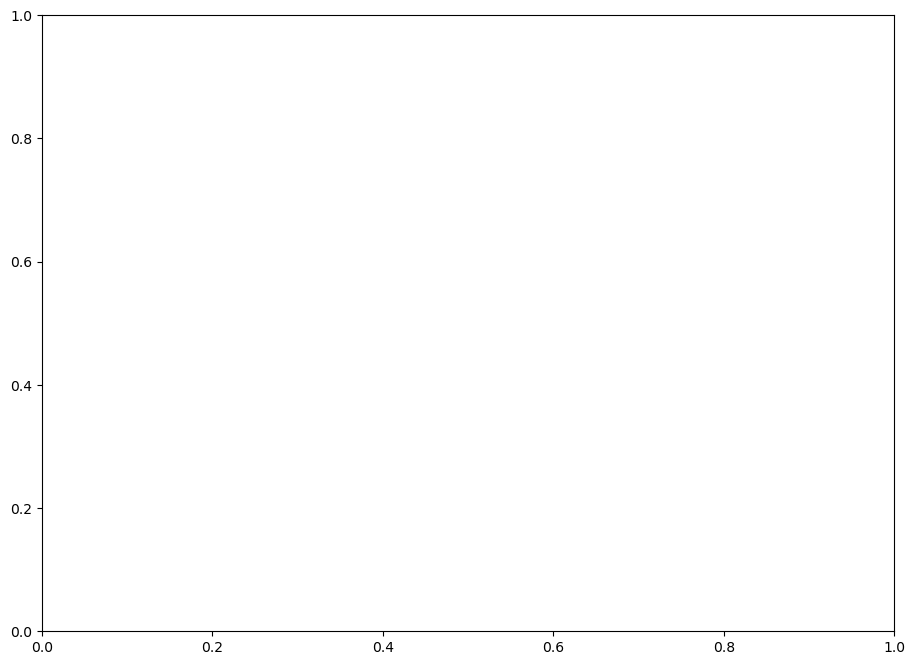

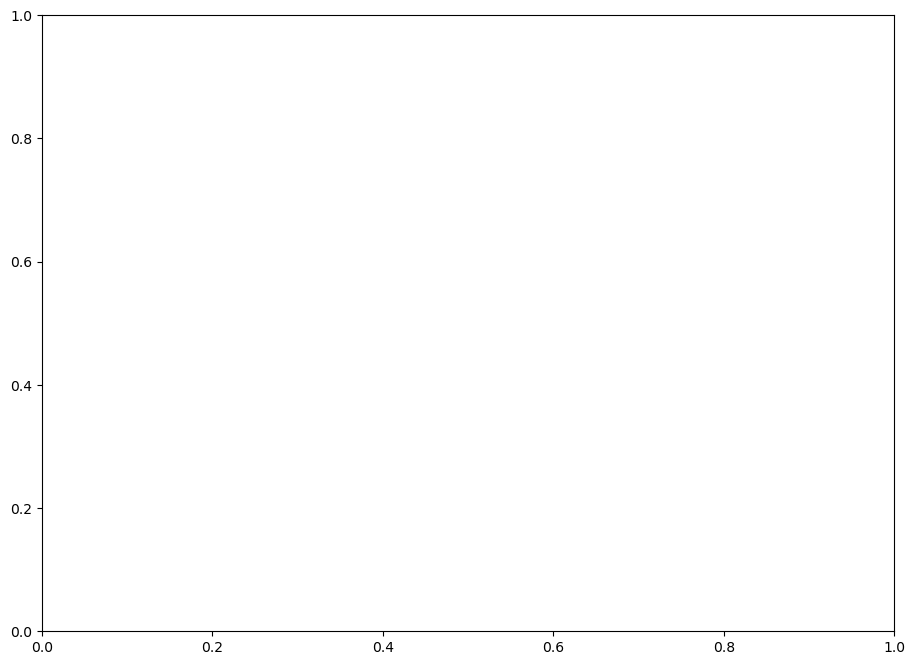

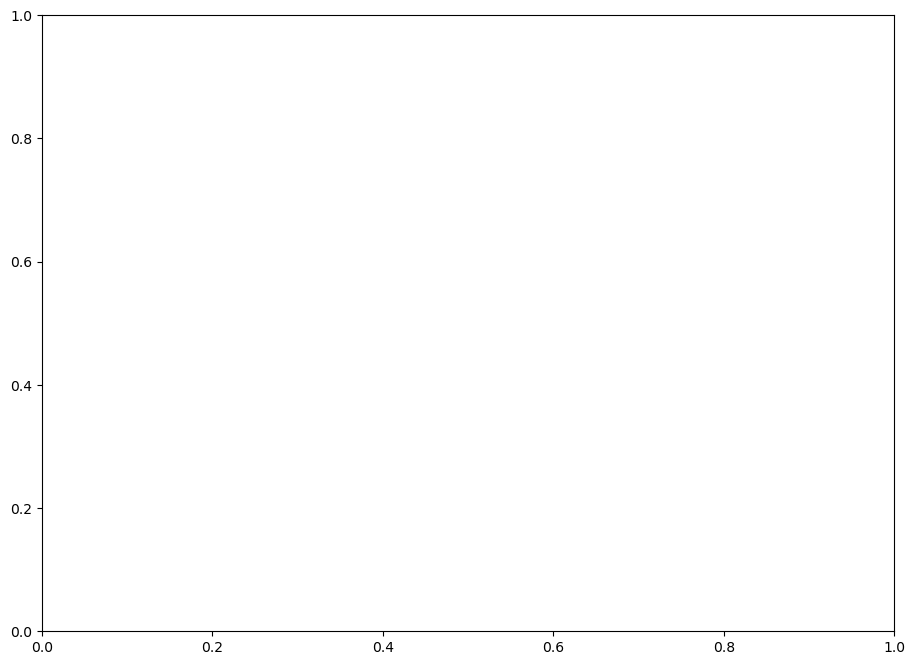

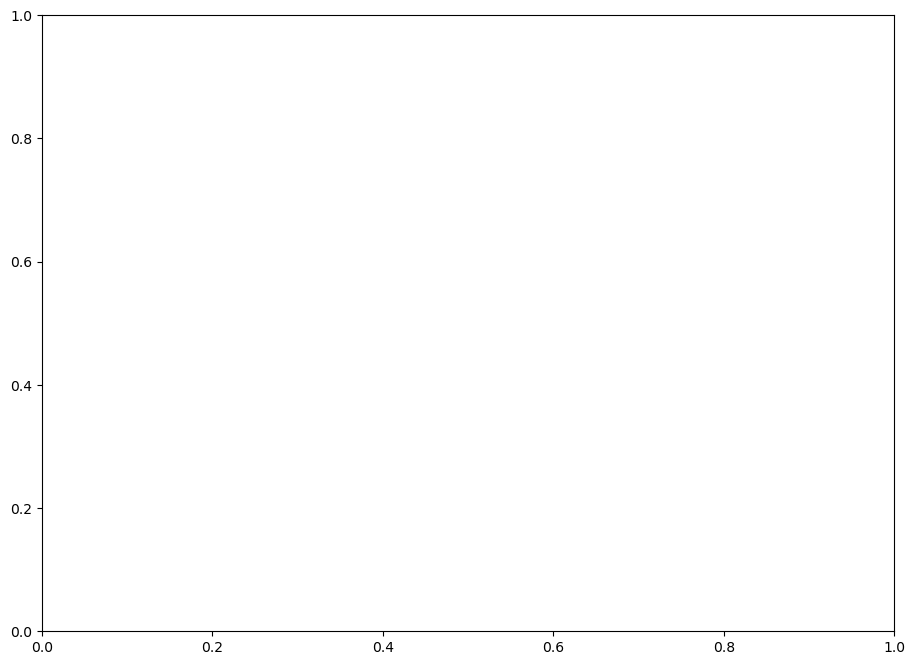

In [74]:

x='body_m'
y='to_v'
temp = drop_columns(df, x, y, None, None, None)
model_fit2(temp, x, y, 1/3)
model_fit2(temp, x, y, 1/6)
model_fit2(temp, x, y, 1/9)
model_fit2(temp, x, y, 0.23)
model_fit2(temp, x, y, 10)

In [42]:
import statsmodels.formula.api as smf
x='body_m'
y='to_v'
temp2 = drop_columns(df, x, y, None, None, None)
temp2['log_body_m'] = np.log10(temp2[x])
temp2['log_to_v'] = np.log10(temp2[y])
#log_body_m = temp2['log_body_m']
#log_to_v = temp2['log_to_v']

formula = 'log_to_v ~ log_body_m'

small_animals = temp2[temp2['body_m'] < 0.1]
big_animals = temp2[temp2['body_m'] > 0.1]


model = smf.ols(formula=formula, data=temp2).fit()
print(model.summary())

print("SMALL")
modelSmall = smf.ols(formula=formula, data=small_animals).fit()
print(modelSmall.summary())

print("BIG")
modelBig = smf.ols(formula=formula, data=big_animals).fit()
print(modelBig.summary())

# Print the summary of the regression model


                            OLS Regression Results                            
Dep. Variable:               log_to_v   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     89.54
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           7.51e-19
Time:                        00:10:50   Log-Likelihood:                 82.264
No. Observations:                 315   AIC:                            -160.5
Df Residuals:                     313   BIC:                            -153.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2849      0.011     26.824      0.0

In [43]:

import statsmodels.formula.api as smf

# Fit the model with an interaction term using statsmodels

x='body_m'
y='to_v'
temp = drop_columns(df, x, y, None, None, None)
temp2= drop_columns(temp, x, 'pwr_bm', None, None, None)
temp2['log_body_m'] = np.log10(temp2[x])
temp2['log_to_v'] = np.log10(temp2[y])
temp2['log_pwr_bm'] = np.log10(temp2['pwr_bm'])
formula = 'log_to_v ~ log_body_m + log_pwr_bm + log_body_m:log_pwr_bm'
model = smf.ols(formula=formula, data=temp2).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               log_to_v   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     95.39
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.09e-28
Time:                        00:10:50   Log-Likelihood:                 60.960
No. Observations:                 100   AIC:                            -113.9
Df Residuals:                      96   BIC:                            -103.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.16

In [44]:
def model_fit3(data, X, Y, power):
    from sklearn.metrics import mean_squared_error, r2_score
    from scipy.stats import f_oneway
    # Assuming log_body_m and log_to_v are your log-transformed data
    temp = data
    # Remove the row with the highest value of 'body_m'
    temp = temp.sort_values('body_m', ascending=False).iloc[1:].reset_index(drop=True)
    x = temp[X]
    y = temp[Y]
    #log_body_m = np.array(np.log10(temp[X]))
    #log_to_v = np.array(np.log10(temp[Y]))

    """
    # Fit the linear model
    model = LinearRegression().fit(log_body_m.reshape(-1, 1), log_to_v)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Predict values
    log_to_v_pred = model.predict(log_body_m.reshape(-1, 1))
    """

    # Predict log(Y) based on  model
    Y_pred = x**power
    if power == 0.23:
        Y_pred = 1.82*x**power

    print("TRYGPT")
    # Calculate residuals (differences between measured and predicted data)
    residuals = y - Y_pred

    # Perform ANOVA (F-test) to compare variances
    f_statistic, p_value = f_oneway(y, Y_pred)

    # Output the F-statistic and p-value
    print(f"F-statistic: {f_statistic:.3f}")
    print(f"P-value: {p_value:.3e}")

    mse = mean_squared_error(y, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, Y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")

    n = len(y)

    # Number of parameters in the model (including intercept)
    k = 2  # Change this if you have more parameters

    # Calculate residuals
    residuals = y - Y_pred

    # Calculate RSS (Residual Sum of Squares)
    RSS = np.sum(residuals**2)

    # Calculate AIC
    AIC = 2*k + n*np.log(RSS/n)

    # Calculate BIC
    BIC = np.log(n)*k + n*np.log(RSS/n)

    # Calculate Pearson Correlation Coefficient
    pearson_corr, _ = stats.pearsonr(y, Y_pred)
    r_squared = r2_score(y, Y_pred)

    # Calculate Standard Error of the Estimate (SEE)
    SEE = np.sqrt(RSS / (n - k))

    # Calculate Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - k - 1))

    print(f"AIC: {AIC}")
    print(f"BIC: {BIC}")
    print(f"Pearson Correlation Coefficient: {pearson_corr}")
    print(f"R-squared: {r_squared}")
    print(f"Standard Error of the Estimate (SEE): {SEE}")
    print(f"Adjusted R-squared: {adjusted_r_squared}")
    
    """mse = mean_squared_error(y, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, Y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")

    correlation_matrix = np.corrcoef(y, Y_pred)
    correlation_xy = correlation_matrix[0, 1]"""

    # Calculate R-squared
    #r2_corr = correlation_xy ** 2
    #print(f'R-squared from correlation (R²): {r2_corr}')

    #correlation_matrix = np.corrcoef(log_to_v, mylist)
    #correlation_xy = correlation_matrix[0, 1]

    # Calculate R-squared
    """r2_corr = correlation_xy ** 2
    print(f'R-squared from correlation (R²): {r2_corr}')"""

    # Plotting
    X_vals = np.linspace(x.min(), x.max(), 1000)
    plt.scatter(temp[X], temp[Y], label='Data')
    plt.plot(X_vals, X_vals**power, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('Body mass(g)')
    plt.ylabel('Take-off velocity')
    plt.legend()
    plt.show()

TRYGPT
F-statistic: 28.531
P-value: 1.292e-07
Mean Squared Error: 3.0361300913956013
Root Mean Squared Error: 1.7424494516041495
R-squared: -2.87343556936576
AIC: 352.7232843806591
BIC: 360.2220703524756
Pearson Correlation Coefficient: 0.40057228331172035
R-squared: -2.87343556936576
Standard Error of the Estimate (SEE): 1.7480253041006995
Adjusted R-squared: -2.898345122866504


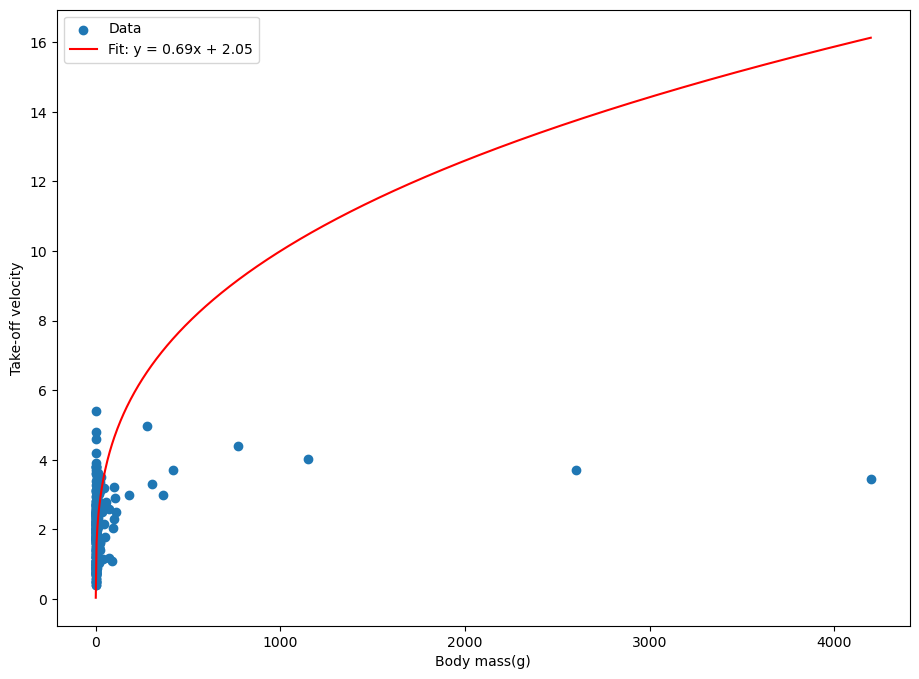

TRYGPT
F-statistic: 385.445
P-value: 3.110e-67
Mean Squared Error: 1.7651055773907456
Root Mean Squared Error: 1.3285727595396293
R-squared: -1.2518872779948844
AIC: 182.41809882585798
BIC: 189.9168847976745
Pearson Correlation Coefficient: 0.435109221730274
R-squared: -1.2518872779948844
Standard Error of the Estimate (SEE): 1.3328242032364936
Adjusted R-squared: -1.2663688682070702


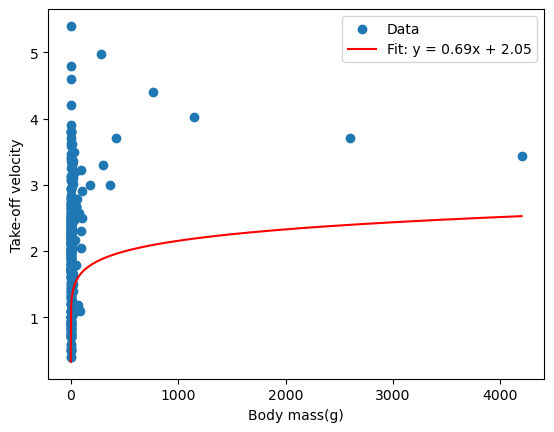

TRYGPT
F-statistic: 284.158
P-value: 7.568e-53
Mean Squared Error: 1.6840962325466733
Root Mean Squared Error: 1.2977273336670818
R-squared: -1.1485371354369907
AIC: 167.6659246532167
BIC: 175.16471062503322
Pearson Correlation Coefficient: 0.43563769086645937
R-squared: -1.1485371354369907
Standard Error of the Estimate (SEE): 1.3018800717488705
Adjusted R-squared: -1.1623540945073247


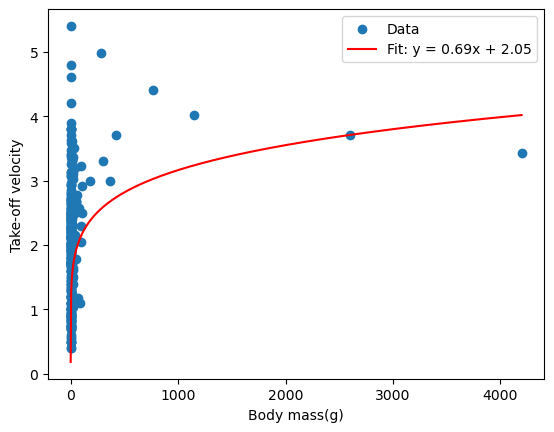

TRYGPT
F-statistic: 0.408
P-value: 5.235e-01
Mean Squared Error: 2.1961741272630046
Root Mean Squared Error: 1.481949434786155
R-squared: -1.8018361285537279
AIC: 251.0290794165904
BIC: 258.5278653884069
Pearson Correlation Coefficient: 0.4283821098718562
R-squared: -1.8018361285537279
Standard Error of the Estimate (SEE): 1.4866916850982694
Adjusted R-squared: -1.819854367322562


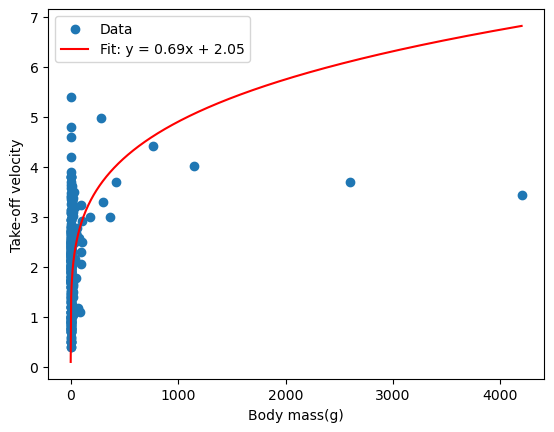

In [45]:
f2, ax2 = plt.subplots(figsize=(11, 8))
x='body_m'
y='to_v'
temp = drop_columns(df, x, y, None, None, None)
model_fit3(temp, x, y, 1/3)
model_fit3(temp, x, y, 1/9)
model_fit3(temp, x, y, 1/6)
model_fit3(temp, x, y, 0.23)

In [46]:
def comp_slopes(data, X, Y, species):
    import statsmodels.formula.api as smf

    temp = data
    temp['logx']=np.log10(temp[X])
    temp['logy']=np.log10(temp[Y])
    #print(temp['logx'].head(10))
    # Fit overall regression line (all species)
    overall_model = smf.ols('logy ~ logx', data=temp).fit()

    # Fit regression line for a specific species
    specific_species = species
    species_data = temp[temp['species'] == specific_species]
    species_model = smf.ols('logy ~ logx', data=species_data).fit()

    # Get coefficients
    overall_slope = overall_model.params['logx']
    overall_intercept = overall_model.params['Intercept']

    species_slope = species_model.params['logx']
    species_intercept = species_model.params['Intercept']

    print(f"Overall Model: Intercept = {overall_intercept}, Slope = {overall_slope}")
    print(f"{specific_species} Model: Intercept = {species_intercept}, Slope = {species_slope}")

    temp['Ancova'] = temp['species'].apply(lambda x: x if x in specific_species else 'Amphibia')

    # Interaction model to compare slopes
    interaction_model = smf.ols('logy ~ logx * C(Ancova)', data=data).fit()

    if species == 'Lithobates_pipiens':
        print(str(species_data.index.size))
        print(f"Degrees of Freedom for the Model: {interaction_model.df_model}")
        print(f"Degrees of Freedom for the Residuals: {interaction_model.df_resid}")

    print("P-value\n"+str(interaction_model.pvalues)+"\n")

    # Check the summary for interaction terms
    print(interaction_model.summary())

    # Model without interaction to compare intercepts
    intercept_model = smf.ols('logy ~ logx + C(Ancova)', data=data).fit()

    # Check the summary for the species term
    print(intercept_model.summary())


In [47]:
x='body_m'
y='to_v'
for sp in specsAmph:
    temp = drop_columns(df_all, x, y, 'Amphibia', None, None)
    print(sp)
    #comp_slopes(temp, x, y, sp)

Lithobates pipiens
Pseudacris triseriata
Limnodynastes peronii
Eleutherodactylus fitzinger
Anaxyrus americanus


In [48]:
import numpy as np
from scipy.stats import t

def compare_slopes_and_intercepts(slope1, intercept1, std_err_slope1, std_err_intercept1, slope2, intercept2, std_err_slope2, std_err_intercept2, n):
    """
    Compares the slopes and intercepts of two linear regression functions.

    Args:
        slope1, intercept1, std_err_slope1, std_err_intercept1: Parameters of the first regression function.
        slope2, intercept2, std_err_slope2, std_err_intercept2: Parameters of the second regression function.
        n: Sample size of each regression model.

    Returns:
        slope_t_statistic, slope_p_value: T-statistic and p-value for the comparison of slopes.
        intercept_t_statistic, intercept_p_value: T-statistic and p-value for the comparison of intercepts.
    """

    # Calculate t-statistics for slopes and intercepts
    slope_t_statistic = (slope1 - slope2) / np.sqrt(std_err_slope1**2 + std_err_slope2**2)
    intercept_t_statistic = (intercept1 - intercept2) / np.sqrt(std_err_intercept1**2 + std_err_intercept2**2)

    # Calculate degrees of freedom
    df = 2 * n - 4

    # Calculate p-values using t-distribution
    slope_p_value = 2 * (1 - t.cdf(abs(slope_t_statistic), df))
    intercept_p_value = 2 * (1 - t.cdf(abs(intercept_t_statistic), df))

    # Print the results
    print("Slope comparison:")
    print("  t-statistic:", slope_t_statistic)
    print("  p-value:", slope_p_value)

    print("\nIntercept comparison:")
    print("  t-statistic:", intercept_t_statistic)
    print("  p-value:", intercept_p_value)

    return slope_t_statistic, slope_p_value, intercept_t_statistic, intercept_p_value


In [49]:
def comp_slopes2(dfx,X,Y,species):
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    from scipy.stats import f

    temp = dfx
    temp['logx']=np.log10(temp[X])
    temp['logy']=np.log10(temp[Y])
    # Example data
    x1 = temp['logx']

    species_data = temp[temp['speciesN'] == species]

    x2 = species_data['logx']  # Data for the first regression line
    
    y1 = temp['logy']  # Data for the second regression line

    y2 = species_data['logy']


    temp['is_specific_species'] = (temp['speciesN'] == species).astype(int)

    temp['highlight'] = temp['species'].apply(lambda x: x if x in species else 'Amphibia')
    #data['highlight'] = data['species'].apply(lambda x: x if x in species else 'Amphibia')

    temp['check']=0
    species_data['check']=1
    

    data = pd.concat([temp, species_data])
    #data['highlight'] = data['species'].apply(lambda x: x if x in species else 'Amphibia')
    model = smf.ols('logy ~ logx', data=temp).fit()

    # Print the summary of the model
    print(model.summary())
    

    """
    # Fit the combined model with interaction terms
    model = smf.ols('logy ~ logx * is_specific_species', data=temp).fit()

    # Output the summary of the model
    print(model.summary())

    print("\n\n")
    """
    # Fit two regression models
    model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
    model2 = sm.OLS(y2, sm.add_constant(x2)).fit()
    
    """
    # Fit the model with interaction term
    model = smf.ols('Y ~ X * Species', data=data).fit()

    # Get the summary of the model
    print(model.summary())

    # Extract p-values
    p_values = model.pvalues
    print("P-values for the model terms:")
    print(p_values)
    """
    # Extract slopes and intercepts

    slope1, intercept1 = model1.params.iloc[1], model1.params.iloc[0]
    slope2, intercept2 = model2.params.iloc[1], model2.params.iloc[0]

    print("N= "+str(species_data.index.size))


    print(slope2)
  
    print(intercept2)

    # Calculate the standard error for the difference in slopes
    se_diff_slope = np.sqrt(model1.bse.iloc[1]**2 + model2.bse.iloc[1]**2)

    # Calculate the t-statistic for slope comparison
    t_value_slope = (slope1 - slope2) / se_diff_slope

    print(f"T-value for slope comparison: {t_value_slope}")

    se_diff_i = np.sqrt(model1.bse.iloc[0]**2 + model2.bse.iloc[0]**2)

    # Calculate the t-statistic for slope comparison
    t_value_i = (intercept1 - intercept2) / se_diff_i

    print(f"T-value for i comparison: {t_value_i}\n")


    # Degrees of freedom (approximation)
    dof = species_data.index.size-2
    print("DoF= "+str(dof))
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_value_slope), dof))
    print("P-value for slope comparison: "+str(p_value)+"\n")


    p_value2 = 2 * (1 - stats.t.cdf(np.abs(t_value_i), dof))
    print("P-value for intercept comparison: "+str(p_value2)+"\n")

    #plt.scatter(x1, y1, color='blue', label='Data 1')
    #plt.scatter(x2, y2, color='red', label='Data 2')
    #plt.plot(x1, intercept1 + slope1 * X, color='blue', label='Regression Line 1')
    #plt.plot(x2, intercept2 + slope2 * X, color='red', label='Regression Line 2')


In [50]:
#f2, ax2 = plt.subplots(figsize=(11, 8))
x='body_m'
y='to_v'
for sp in specsInsecta:
    temp = drop_columns(df_all, x, y, 'Insecta', None, None)
    print(sp)
    comp_slopes2(temp, x, y, sp)
    break


Teleogryllus commodus
                            OLS Regression Results                            
Dep. Variable:                   logy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5726
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.450
Time:                        00:10:51   Log-Likelihood:                 106.61
No. Observations:                 559   AIC:                            -209.2
Df Residuals:                     557   BIC:                            -200.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1558      0.0

C:\Users\tiago\AppData\Local\Temp\ipykernel_10692\1608274981.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['check']=1


In [51]:
# Perform Chow test

def chow_test2(model1, model2, combined_model):
    """import numpy as np
    from scipy import stats
    import pandas as pd
    import statsmodels.formula.api as smf
    n1 = model1.nobs
    n2 = model2.nobs
    k = combined_model.df_model  # number of parameters
    
    rss_combined = combined_model.ssr
    rss_separate = model1.ssr + model2.ssr
    
    f_statistic = ((rss_combined - rss_separate) / k) / (rss_separate / (n1 + n2 - 2 * k))
    p_value = 1 - stats.f.cdf(f_statistic, k, n1 + n2 - 2 * k)
    
    return f_statistic, p_value

# Combine the data
combined_data = pd.concat([temp, temp])
combined_data['group'] = np.where(combined_data['Class'] == jump_m, 1, 0)

# Fit the combined model
combined_model = smf.ols('logy ~ logx + group + logx:group', data=combined_data).fit()

# Perform Chow test
f_statistic, p_value_chow = chow_test(model1, model2, combined_model)

#print(f"Chow test F-statistic: {f_statistic}")
#print(f"Chow test p-value: {p_value_chow}")

if p_value_chow < 0.05:
    print("The Chow test suggests that there is a significant difference between the two regression models.")
else:
    print("The Chow test suggests that there is no significant difference between the two regression models.")"""

In [52]:
def chow_test(df, X, Y, slope1, slope2, intercept1, intercept2):

    temp = drop_columns(df, X, Y, None, None, None)
    # Prepare the data
    #x = np.log10(temp[X]).values
    #y = np.log10(temp[Y]).values
    x = temp[X].values
    y = temp[Y].values
    n = len(x)

    # Calculate predicted values for both models
    #y_pred1 = slope1 * x + intercept1
    #y_pred2 = slope2 * x + intercept2
    y_pred1 = intercept1*x**slope1
    y_pred2 = intercept2*x**slope2

    yf=y_pred1-y_pred2

    mod=sm.OLS(yf, sm.add_constant(x))

    res=mod.fit()

    print(res.summary())

    # Calculate residual sum of squares for both models
    rss1 = np.sum((y - y_pred1) ** 2)
    rss2 = np.sum((y - y_pred2) ** 2)

    # Fit a pooled model (single regression for all data combined)
    slope_pooled, l, intercept_pooled = np.polyfit(x, y, 2)
    y_pred_pooled = slope_pooled * x + intercept_pooled
    rss_pooled = np.sum((y - y_pred_pooled) ** 2)

    # Calculate the Chow test statistic
    k = 2  # number of parameters in each model (slope and intercept)
    chow_statistic = ((rss_pooled - (rss1 + rss2)) / k) / ((rss1 + rss2) / (n - 2 * k))

    # Calculate the p-value
    df1 = k
    df2 = n - 2 * k
    p_value = 1 - stats.f.cdf(chow_statistic, df1, df2)
    
    return {
        'chow_statistic': chow_statistic,
        'p_value': p_value,
        'df1': df1,
        'df2': df2
    }

In [53]:
result = chow_test(df, 'body_m', 'to_v', 1/9, 1/5, 0.29, 0.01)
print(f"Chow test statistic: {result['chow_statistic']}")
print(f"P-value: {result['p_value']}")
print(f"Degrees of freedom: ({result['df1']}, {result['df2']})")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     47.58
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.94e-11
Time:                        00:10:51   Log-Likelihood:                 286.91
No. Observations:                 315   AIC:                            -569.8
Df Residuals:                     313   BIC:                            -562.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2823      0.006     51.210      0.0

In [54]:
def comp_slopes3(dfx,X,Y,jump_m):
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    temp = dfx
    temp['logx']=np.log10(temp[X])
    temp['logy']=np.log10(temp[Y])
    # Example data
    x1 = temp['logx']

    species_data = temp[temp['Class'] == jump_m]

    x2 = species_data['logx']  # Data for the first regression line
    
    y1 = temp['logy']  # Data for the second regression line

    y2 = species_data['logy']

    temp['is_specific_species'] = (temp['Class'] == jump_m).astype(int)

    #temp['highlight'] = temp['jump_mech'].apply(lambda x: x if x in jump_m else 'Amphibia')
    #data['highlight'] = data['species'].apply(lambda x: x if x in species else 'Amphibia')

    temp['check']=0
    species_data['check']=1
    
    # Fit two regression models
    model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
    model2 = sm.OLS(y2, sm.add_constant(x2)).fit()

    # Extract slopes and intercepts

    slope1, intercept1 = model1.params.iloc[1], model1.params.iloc[0]
    slope2, intercept2 = model2.params.iloc[1], model2.params.iloc[0]

    print("N= "+str(species_data.index.size))

    print(slope1)
    print(slope2)
    print(intercept1)
    print(intercept2)

    # Calculate the standard error for the difference in slopes
    se_diff_slope = np.sqrt(model1.bse.iloc[1]**2 + model2.bse.iloc[1]**2)

    # Calculate the t-statistic for slope comparison
    t_value_slope = (slope1 - slope2) / se_diff_slope

    print(f"T-value for slope comparison: {t_value_slope}")

    se_diff_i = np.sqrt(model1.bse.iloc[0]**2 + model2.bse.iloc[0]**2)

    # Calculate the t-statistic for slope comparison
    t_value_i = (intercept1 - intercept2) / se_diff_i

    print(f"T-value for i comparison: {t_value_i}\n")


    # Degrees of freedom (approximation)
    dof = species_data.index.size-2 
    print("DoF= "+str(dof))
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_value_slope), dof))
    print("P-value for slope comparison: "+str(p_value)+"\n")


    p_value2 = 2 * (1 - stats.t.cdf(np.abs(t_value_i), dof))
    print("P-value for intercept comparison: "+str(p_value2)+"\n")



    ###################################################
    


    
    #plt.scatter(x1, y1, color='blue', label='Data 1')
    #plt.scatter(x2, y2, color='red', label='Data 2')
    #plt.plot(x1, intercept1 + slope1 * X, color='blue', label='Regression Line 1')
    #plt.plot(x2, intercept2 + slope2 * X, color='red', label='Regression Line 2')

In [55]:
#f2, ax2 = plt.subplots(figsize=(11, 8))
x='body_m'
y='to_v'
jump_m=['LaMSA', 'Muscle actuation']

for sp in specsClass:
    temp = drop_columns(df, x, y, None, None, None)
    print(sp)
    comp_slopes3(temp, x, y, sp)

Arachnida
N= 11
0.06636526323034583
-0.03725194407853672
0.2849009088900539
-0.14531981350294204
T-value for slope comparison: 2.4506702043298936
T-value for i comparison: 4.93176060052305

DoF= 9
P-value for slope comparison: 0.036716328963577016

P-value for intercept comparison: 0.0008113740066055808

Amphibia
N= 195
0.06636526323034583
0.029168467078867225
0.2849009088900539
0.310913045496373
T-value for slope comparison: 2.164056697876081
T-value for i comparison: -1.560965789991482

DoF= 193
P-value for slope comparison: 0.03168836152150245

P-value for intercept comparison: 0.12017005577012574

Insecta
N= 93
0.06636526323034583
0.03418141922599372
0.2849009088900539
0.22801903878679491
T-value for slope comparison: 0.8840040060830087
T-value for i comparison: 0.7321846086080288

DoF= 91
P-value for slope comparison: 0.3790236651710934

P-value for intercept comparison: 0.4659374828727003

Mammalia
N= 13
0.06636526323034583
-0.0068533321130905545
0.2849009088900539
0.535784390206

C:\Users\tiago\AppData\Local\Temp\ipykernel_10692\3193165126.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['check']=1
C:\Users\tiago\AppData\Local\Temp\ipykernel_10692\3193165126.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_data['check']=1
C:\Users\tiago\AppData\Local\Temp\ipykernel_10692\3193165126.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [56]:
def comp2straight(dfx,X,Y):
    import statsmodels.api as sm
    import statsmodels.formula.api as smf

    temp = dfx
    temp['logx']=np.log10(temp[X])
    temp['logy']=np.log10(temp[Y])
    # Example data
    x1 = temp['logx']

    lamsa = temp[temp['jump_mech'] == 'LaMSA']
    ma = temp[temp['jump_mech'] == 'Muscle actuation']

    x1 = lamsa['logx']

    x2 = ma['logx']  # Data for the first regression line
    
    y1 = lamsa['logy']  # Data for the second regression line

    y2 = ma['logy']

    #temp['is_specific_species'] = (temp['jump_mech'] == jump_m).astype(int)

    #temp['highlight'] = temp['jump_mech'].apply(lambda x: x if x in jump_m else 'Amphibia')
    #data['highlight'] = data['species'].apply(lambda x: x if x in species else 'Amphibia')

    #temp['check']=0
    #species_data['check']=1
    
    # Fit two regression models
    model1 = sm.OLS(y1, sm.add_constant(x1)).fit()
    model2 = sm.OLS(y2, sm.add_constant(x2)).fit()

    # Extract slopes and intercepts

    slope1, intercept1 = model1.params.iloc[1], model1.params.iloc[0]
    slope2, intercept2 = model2.params.iloc[1], model2.params.iloc[0]

    #print("N= "+str(species_data.index.size))

    print(slope1)
    print(slope2)
    print(intercept1)
    print(intercept2)

    # Calculate the standard error for the difference in slopes
    se_diff_slope = np.sqrt(model1.bse.iloc[1]**2 + model2.bse.iloc[1]**2)

    # Calculate the t-statistic for slope comparison
    t_value_slope = (slope1 - slope2) / se_diff_slope

    print(f"T-value for slope comparison: {t_value_slope}")

    se_diff_i = np.sqrt(model1.bse.iloc[0]**2 + model2.bse.iloc[0]**2)

    # Calculate the t-statistic for slope comparison
    t_value_i = (intercept1 - intercept2) / se_diff_i

    print(f"T-value for i comparison: {t_value_i}\n")


    # Degrees of freedom (approximation)
    dof = lamsa.index.size-2
    #print("DoF= "+str(dof))
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_value_slope), dof))
    print("P-value for slope comparison: "+str(p_value)+"\n")


    p_value2 = 2 * (1 - stats.t.cdf(np.abs(t_value_i), dof))
    print("P-value for intercept comparison: "+str(p_value2)+"\n")

In [57]:
x='body_m'
y='power'
temp = drop_columns(df, x, y, None, None, None)
comp2straight(temp,x,y)

0.6912986163695876
0.6424500712788066
2.0489842950229864
1.5102620553382313
T-value for slope comparison: 0.43780119631858494
T-value for i comparison: 2.521692737830845

P-value for slope comparison: 0.6645657712723687

P-value for intercept comparison: 0.017032206523438065



In [58]:
def plot_regression3(data, X, Y, class_type=None, order=None, species = None):

    title="All animals"

    #cleaning dataframe
    temp_data=drop_columns(data, X, Y, class_type, order,species)
    
    if class_type != None:
        title=class_type
    
    ##################################################################
    #Normal Data
    #f, ax = plt.subplots(figsize=(8, 6))
    #plotting(temp_data, X, Y, class_type, order, f, ax, "false")
    ##################################################################################################
    #LOG PLOT
    f2, ax2 = plt.subplots(figsize=(8, 6))
    plotting(temp_data, X, Y, class_type, order, species, f2, ax2, "true",temp_data['Class'], specsAmph)

    sorted_df = temp_data.sort_values(by=Y, ascending=True)
    top_two = sorted_df.head(10)
    result = top_two[Y].values
    print(result)
    

    """
    unique_class_types = temp_data['Class'].unique()
    print(unique_class_types)

    
    if class_type==None:
        for j in unique_class_types:
            regression(temp_data, X, Y, j, order, "true")
            plotting(temp_data, X, Y, class_type, order, f2, ax2, "true")
            print(j)
    """

#plot_regression2(df, 'body_m', 'to_v', class_type=None)

In [59]:
def calculate_r_squared(df, X, Y):
    # Extract X and Y data from the dataframe
    x = df[X].values
    y = df[Y].values
    
    # Calculate logarithms (assuming you want log-log regression)
    log_x = np.log10(x)
    log_y = np.log10(y)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)
    
    # Calculate R-squared
    r_squared = r_value ** 2
    
    # Calculate R-squared for slope and intercept separately
    y_pred = slope * log_x + intercept
    residuals = log_y - y_pred
    
    ss_total = np.sum((log_y - np.mean(log_y))**2)
    ss_slope = np.sum((y_pred - np.mean(log_y))**2)
    ss_intercept = np.sum((np.mean(log_y) - intercept)**2)
    
    r_squared_slope = ss_slope / ss_total
    r_squared_intercept = ss_intercept / ss_total
    
    return {
        'R-squared (overall)': r_squared,
        'R-squared (slope)': r_squared_slope,
        'R-squared (intercept)': r_squared_intercept,
        'Slope': slope,
        'Intercept': intercept
    }

In [60]:
#plot_regression3(df, 'body_m', 'to_v', )

In [61]:
def plot_regression4(data, X, Y,  hueV, class_type=None, order=None):
    f3, ax3 = plt.subplots(figsize=(11, 7))
    temp2=drop_columns(data, X, Y, class_type, order)
    temp2['log_body_m'] = np.log(temp2[X])
    temp2['log_to_v'] = np.log(temp2[Y])
    #temp2 = temp2[~temp2[hueV].isin(['Unknown', 'Hydraulic mechanism', 'Body-catapult'])]
    # Scatterplot for all data points
    colors = ['#4C72B0','#DD8452','#5CB85C', '#8172B2', '#B07AA1']
    markers = {'Amphibia': 'o', 'Mammalia': 'P', 'Insecta':'D', 'Arachnida':'X', 'Reptilia':'^'}
    sns.scatterplot(data=temp2, x=X, y=Y, hue=hueV, style= hueV, s=55, palette=colors, legend='full', markers=markers,ax=ax3)
    #sns.scatterplot(data=temp2, x=X, y=Y, s=55, legend='full',ax=ax3)
    #plt.scatter(temp2[X], temp2[Y],color="#4C72B0",  s=50,)

    unique_classes = temp2[hueV].unique()
    print(unique_classes)
    

    [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(temp2, X, Y, "true")

    print("r2= "+str(r2))

    x_fit = np.linspace(x.min(), x.max(), 1000)
    y_fit = slope * x_fit + intercept
    

    xp = sm.add_constant(x)

    # Fit the regression model
    model = sm.OLS(y, xp).fit()

    conf_intervals = model.conf_int(0.05)
    print(conf_intervals)
    print(model.summary())
    
    unique_class = temp2['Class'].unique()
    
    for i, cl in enumerate(unique_class):
        if cl == 'Reptilia': #or cl == 'Arachnida' or cl == 'Mammalia':
            continue

        subset = temp2[temp2['Class'] == cl]
        if len(subset) < 2:
            continue

        [x, y, slope, intercept, r2, p_value, std_err, r_value] = regression(subset, X, Y, "true")

        X2 = sm.add_constant(x)

        log_X_vals = np.linspace(x.min(), x.max(), 1000)
        log_Y_vals = slope * log_X_vals + intercept

        plot_otherfit(log_X_vals, log_Y_vals, slope, intercept, cl, color=colors[i % len(colors)], r2=r2)
        #species_reg_plot(temp,'jump_mech',X,Y)

        # Fit the OLS model
        model = sm.OLS(y, X2).fit()

        # Get the confidence intervals
        conf_intervals = model.conf_int()

        # Print the results
        print(cl)
        print(f"Confidence intervals for the {cl} coefficients:")
        print(conf_intervals)
        print(model.summary())
    
    #plt.axhline(y=6, color='r', linestyle='--')
    #plt.text(0.5, 6 + 0.1, 'Take-off velocity limit 6 ms⁻¹', color='black', ha='center', fontsize=8)
    plot_fitf(x_fit, y_fit,slope,intercept,r2,ax3,"true","All animals","red")
    plt.xlabel("log("+graph_label(X)+")")
    plt.ylabel("log("+graph_label(Y)+")")
    plt.xscale('log')
    plt.yscale('log')
    #ax3.xscale('log')
    #ax3.yscale('log')
    
    plt.legend(loc='lower right',prop={'size': 8})
    #plt.legend(prop={'size': 7})

    
    y_ticks = [ 0.4, 1, 2, 3, 5.5]  # Adjust these values according to your data range

    # Set y-ticks and corresponding labels
    plt.yticks(y_ticks, labels=[str(tick) for tick in y_ticks])

    
    f3.tight_layout()
    #plt.show()
    #plt.savefig("image.png",bbox_inches='tight',dpi=100)

    fig1 = plt.gcf()
    fig1.tight_layout()
    if class_type == None:
        class_type="All animals"
    fig1.savefig(fname=class_type+'-'+X+'-'+Y+'-log.png', bbox_inches='tight', dpi=100)
    plt.show()
    plt.draw()


    #results = calculate_r_squared(temp2, X, Y)
    #print(results)

['Mammalia' 'Amphibia' 'Insecta' 'Arachnida' 'Reptilia']
r2= 0.22244017048680675
               0         1
const   0.264003  0.305799
body_m  0.052566  0.080165
                            OLS Regression Results                            
Dep. Variable:                   to_v   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     89.54
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           7.51e-19
Time:                        00:10:51   Log-Likelihood:                 82.264
No. Observations:                 315   AIC:                            -160.5
Df Residuals:                     313   BIC:                            -153.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

c:\Users\tiago\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


Amphibia
Confidence intervals for the Amphibia coefficients:
               0         1
const   0.285587  0.336239
body_m -0.001782  0.060119
                            OLS Regression Results                            
Dep. Variable:                   to_v   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.455
Date:                Thu, 05 Sep 2024   Prob (F-statistic):             0.0646
Time:                        00:10:51   Log-Likelihood:                 118.26
No. Observations:                 195   AIC:                            -232.5
Df Residuals:                     193   BIC:                            -226.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

c:\Users\tiago\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


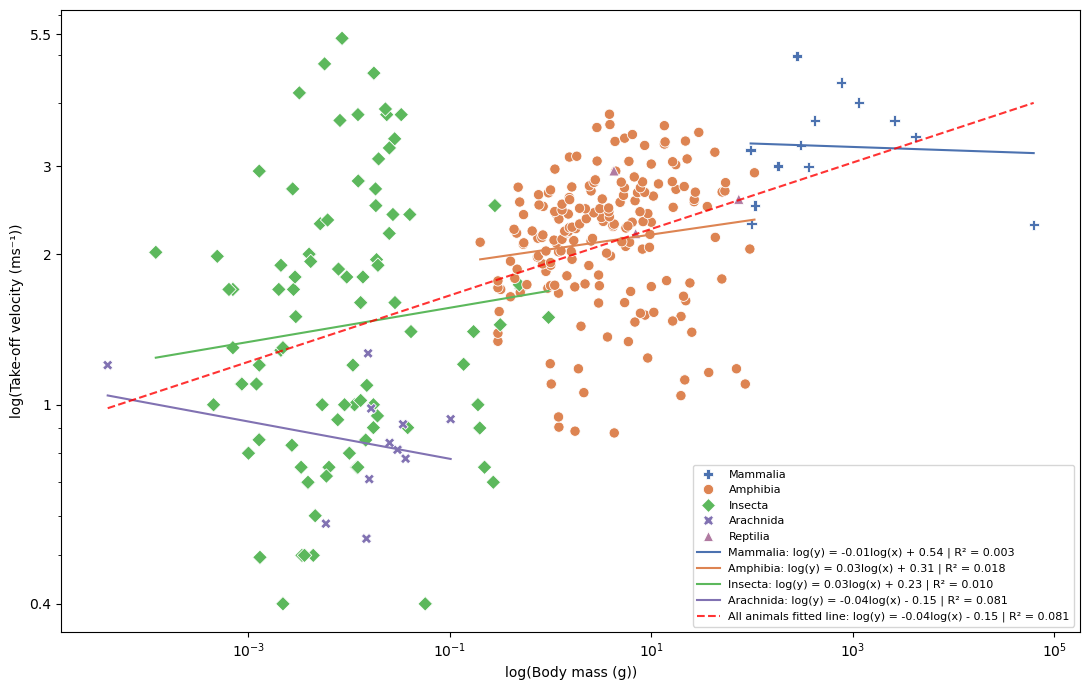

<Figure size 640x480 with 0 Axes>

In [62]:
plot_regression4(df, 'body_m', 'to_v',hueV='Class', class_type=None, order=None)
#plot_regression4(df, 'body_m', 'to_v',hueV=None, class_type=None, order=None)

In [63]:
import matplotlib.pyplot as plt

def combine_plots(plot_func1, plot_func2, *args, **kwargs):
    """
    Combines the output of two plotting functions into a single figure with subplots.
    
    Parameters:
    plot_func1, plot_func2: The plotting functions to be combined
    *args, **kwargs: Arguments to be passed to both plotting functions
    
    Returns:
    fig: The combined figure
    """
    # Create a new figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Call the first plotting function and capture its output
    fig1 = plot_func1(*args, **kwargs)
    
    # Call the second plotting function and capture its output
    fig2 = plot_func2(*args, **kwargs)
    
    # Copy the contents of the first figure to the first subplot
    for ax in fig1.get_axes():
        img = ax.get_images()[0] if ax.get_images() else None
        new_ax = fig.add_subplot(121, sharex=ax, sharey=ax)
        if img:
            new_ax.imshow(img.get_array(), extent=img.get_extent(), aspect=img.get_aspect())
        for line in ax.get_lines():
            new_ax.add_line(line)
        new_ax.set_title(ax.get_title())
        new_ax.set_xlabel(ax.get_xlabel())
        new_ax.set_ylabel(ax.get_ylabel())
    
    # Copy the contents of the second figure to the second subplot
    for ax in fig2.get_axes():
        img = ax.get_images()[0] if ax.get_images() else None
        new_ax = fig.add_subplot(122, sharex=ax, sharey=ax)
        if img:
            new_ax.imshow(img.get_array(), extent=img.get_extent(), aspect=img.get_aspect())
        for line in ax.get_lines():
            new_ax.add_line(line)
        new_ax.set_title(ax.get_title())
        new_ax.set_xlabel(ax.get_xlabel())
        new_ax.set_ylabel(ax.get_ylabel())
    
    # Adjust the layout and display the combined figure
    plt.tight_layout()
    return fig

# Example usage:
temp = drop_columns(df_all, X, Y, 'Amphibia', None, None)
#plotting(temp, X, Y, 'Amphibia', None, None, f2, ax2, "true", None)
#combined_fig = combine_plots(plotting(temp, X, Y, 'Amphibia', None, None, f2, ax2, "true", None, specsAmph), plotting2(temp, X, Y, 'Insecta', None, None, f2, ax2, "true", None))
#combined_fig.savefig('combined_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [64]:
species_all = set(df_all['species'].unique())
species_df = set(df['species'].unique())
unique_species = species_all - species_df

# Print the unique species
for species in unique_species:
    print(species)

Itersonilia_perplexans
Eleutherodactylus_chochLithobatese
Metcalfa_pruinosa_
Limnaoedus_ocularis
Felis_Catus
Avahi_Laniger
CycloLithobates_longipes
Rhampholeon_spinosus
VitreoLithobates_eurygnatha
NanoLithobates_yunnanensis
IndiLithobates_brachytarsus
Hydra_sp
Graphocephala_coccinea
Auricularia_auricula
Hyla_squirella_
OdorLithobates_hosii
Archaeopsylla_erinacei
CycloLithobates_australis
OdorLithobates_grahami
Chrysoperla_camea
Leptodactylus
Litoria_micromembLithobates


In [65]:
"""filtered_df = df[df['Jumping mechanism'].isna() | (df['Jumping mechanism'] == '')]
    
# Get the unique species from the filtered DataFrame
unique_species = filtered_df['species'].unique()
    
# Convert the unique species to a list and return
print(unique_species.tolist())"""

"filtered_df = df[df['Jumping mechanism'].isna() | (df['Jumping mechanism'] == '')]\n    \n# Get the unique species from the filtered DataFrame\nunique_species = filtered_df['species'].unique()\n    \n# Convert the unique species to a list and return\nprint(unique_species.tolist())"

In [66]:
def write_species_info_and_means_to_excel(df, filename='TODOMEAN.xlsx'):
    # Extract unique rows based on 'Species'
    unique_species_df = df.drop_duplicates(subset=['species'])
    
    # Select the relevant columns for species information
    info_columns_to_save = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'species']
    unique_species_info_df = unique_species_df[info_columns_to_save]
    
    # List of columns to calculate means for
    mean_columns = [
        'body_m', 'body_l', 'acc', 'to_v', 'j_height', 'j_dist', 'to_ang', 
        'to_time', 'muscle_mass', 'force', 'ke', 'power', 'mass_power'
    ]
    
    # Create a DataFrame to store the results
    results = []

    # Calculate means for each unique species and add to the results
    for species in unique_species_df['species']:
        # Filter the dataframe for the current species
        species_df = df[df['species'] == species]
        
        # Calculate the mean of the specified columns
        species_means = species_df[mean_columns].mean().to_dict()
        
        # Add species information to the results
        species_info = unique_species_df[unique_species_df['species'] == species].iloc[0].to_dict()
        
        # Combine species information with the means
        combined_info = {**species_info, **species_means}
        results.append(combined_info)
    
    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Create a Pandas Excel writer using openpyxl as the engine
    with pd.ExcelWriter(filename, engine='openpyxl') as writer:
        # Write the combined DataFrame to the Excel file
        results_df.to_excel(writer, sheet_name='Species_Info_and_Means2', index=False)
    
    print(f"Species information and means have been written to {filename}")

In [67]:
df3 = pd.DataFrame({
    'species': ['A', 'B', 'C', 'A', 'D', 'B', 'E'],
    'Phylum': ['P1', 'P2', 'P3', 'P1', 'P4', 'P2', 'P5'],
    'Class': ['C1', 'C2', 'C3', 'C1', 'C4', 'C2', 'C5'],
    'Order': ['O1', 'O2', 'O3', 'O1', 'O4', 'O2', 'O5'],
    'Family': ['F1', 'F2', 'F3', 'F1', 'F4', 'F2', 'F5'],
    'Genus': ['G1', 'G2', 'G3', 'G1', 'G4', 'G2', 'G5'],
    'body_m': [1, 2, 3, 4, 5, 6, 7],
    'body_l': [2, 3, 4, 5, 6, 7, 8],
    'acc': [3, 4, 5, 6, 7, 8, 9],
    'to_v': [4, 5, 6, 7, 8, 9, 10],
    'j_height': [5, 6, 7, 8, 9, 10, 11],
    'j_dist': [6, 7, 8, 9, 10, 11, 12],
    'to_ang': [7, 8, 9, 10, 11, 12, 13],
    'to_time': [8, 9, 10, 11, 12, 13, 14],
    'muscle_mass': [9, 10, 11, 12, 13, 14, 15],
    'force': [10, 11, 12, 13, 14, 15, 16],
    'ke': [11, 12, 13, 14, 15, 16, 17],
    'power': [12, 13, 14, 15, 16, 17, 18],
    'mass_power': [13, 14, 15, 16, 17, 18, 19]
})

#write_species_info_and_means_to_excel(df)

In [68]:
def takeoff_velocity(j_dist, to_ang):
    # Assuming a basic physics formula for takeoff velocity based on horizontal distance and angle
    # v = sqrt(g * j_dist / sin(2 * to_ang)), where g = 9.81 m/s^2
    to_ang_rad = np.radians(to_ang)
    return np.sqrt(9.81 * j_dist / np.sin(2 * to_ang_rad))

def takeoff_velocityH(j_height, to_ang):
    # Assuming a basic physics formula for takeoff velocity based on vertical height and angle
    # v = sqrt(2 * g * j_height / sin^2(to_ang)), where g = 9.81 m/s^2
    to_ang_rad = np.radians(to_ang)
    return np.sqrt(2 * 9.81 * j_height / (np.sin(to_ang_rad) ** 2))

def calculate_to_v(df):
    results = []
    newly_calculated = []

    for index, row in df.iterrows():
        species = row['species']
        to_v = row['to_v']
        
        if pd.notna(to_v):
            results.append({'species': species, 'to_v': to_v})
            continue
        
        j_dist = row['j_dist']
        j_height = row['j_height']
        to_ang = row['to_ang']
        
        if pd.notna(j_dist) and pd.notna(to_ang):
            to_v = takeoff_velocity(j_dist, to_ang)
        elif pd.notna(j_height) and pd.notna(to_ang):
            to_v = takeoff_velocityH(j_height, to_ang)
        elif pd.isna(to_ang) and pd.notna(j_height) and pd.notna(j_dist):
            to_v = np.sqrt(2 * 9.81 * j_height + (9.81 * j_dist ** 2) / (2 * j_height))
        elif pd.isna(to_ang) and pd.notna(j_dist):
            to_ang = 45
            to_v = takeoff_velocity(j_dist, to_ang)
        elif pd.isna(to_ang) and pd.notna(j_height):
            to_ang = 45
            to_v = takeoff_velocityH(j_height, to_ang)
        else:
            to_v = np.nan
        
        #print(f"Species: {species}, to_v: {to_v}")  # Debugging statement
        newly_calculated.append({'Species': species, 'to_v': to_v})
        results.append({'species': species, 'to_v': to_v})

    results_df = pd.DataFrame(results)
    
    # Write the results to an Excel file
    results_df.to_excel('forTO.xlsx', sheet_name='Species_to_v', index=False)
    
    print(f"Species and calculated to_v values have been written to forTO.xlsx")

    print("\nNewly calculated to_v values:")
    for item in newly_calculated:
       print(f"Species: {item['Species']}, to_v: {item['to_v']}")

# Example usage with a sample DataFrame
df33 = pd.DataFrame({
    'species': ['A', 'B', 'C', 'D', 'E'],
    'j_dist': [1.0, np.nan, 1.5, 2.0, np.nan],
    'j_height': [np.nan, 0.5, np.nan, 0.3, 0.8],
    'to_ang': [30, 45, np.nan, 60, np.nan],
    'to_v': [np.nan, np.nan, np.nan, np.nan, np.nan]
})

#calculate_to_v(df)